## Maestría en Explotación de Datos y Gestión del Conocimiento - 2021
## Introducción a Data Mining
### Caso 2 - Telco Co.

#### __Integrantes:__
1. Martín Gardel 
2. Dario Ubeda 
3. José Ignacio Segret 
4. Augusto de Biassi 
5. Fernando Bloise 
6. Rafael Aguilar
7. Santiago Dellachiesa



In [1]:
# Para iniciar la exploración de datos se importan las librerías requeridas para tener acceso a las funciones que permitan el procedimiento
# IMPORTANDO LIBRERÍAS

#Analisis de Datos
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

#Desactivacion de warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action= "ignore", category= FutureWarning )

#Representacion gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

%load_ext autotime

time: 0 ns (started: 2021-08-17 00:00:45 -03:00)


In [2]:
# CARGANDO SET DE DATOS USANDO PANDAS

datos_churn = pd.read_csv ("Churn_ETL_RA.csv")
print("El set de datos fue cargado satisfactoriamente.")

El set de datos fue cargado satisfactoriamente.
time: 31 ms (started: 2021-08-17 00:00:45 -03:00)


In [3]:
datos_churn

State  Account_Length  Area_Code     Phone Intl_Plan Vmail_Plan  \
0       KS             128        415  382-4657        no        yes   
1       OH             107        415  371-7191        no        yes   
2       NJ             137        415  358-1921        no         no   
3       OH              84        408  375-9999       yes         no   
4       OK              75        415  330-6626       yes         no   
...    ...             ...        ...       ...       ...        ...   
3094    MN              91        415  382-9297        no         no   
3095    AL             181        415  330-9294        no        yes   
3096    CO             118        415  362-8763        no        yes   
3097    ME             112        415  403-4816        no         no   
3098    GA              93        415  371-2155        no         no   

      Vmail_Message  Day_Mins  Day_Calls  Day_Charge  ...  unk2  unk3  unk4  \
0                25       265          1         110  ...     1    10     3   
1                26       161          6         123  ...    45    13     7   
2                 0       243          4         114  ...    32    12     2   
3                 0       299          4          71  ...    86     6     6   
4                 0       166          7         113  ...    41    10     1   
...             ...       ...        ...         ...  ...   ...   ...   ...   
3094              0       133          8          61  ...    53    10     5   
3095             27       190          3          93  ...    10     6     4   
3096             36       294          9         106  ...    51     9     8   
3097              0       185          4         114  ...    10    11     2   
3098              0       179          5         121  ...    45    12     4   

      unk5  unk6    unk7    unk8  Churn_orig  Churn_complete  Churn_code  
0        2     7       1  False.         NaN          False.           0  
1        3     3       7       1      False.          False.           0  
2        5     3      29       0      False.          False.           0  
3        7     1      78       2      False.          False.           0  
4        3     2      73       3      False.          False.           0  
...    ...   ...     ...     ...         ...             ...         ...  
3094     2     2      84       1      False.          False.           0  
3095     2    86       1  False.         NaN          False.           0  
3096     5     2      65       3      False.          False.           0  
3097     7     2  False.     NaN         NaN          False.           0  
3098     3    24       0  False.         NaN          False.           0  

[3099 rows x 31 columns]

time: 63 ms (started: 2021-08-17 00:00:45 -03:00)


### Variables Meaning:
1. __State:__ categorical, for the 50 states and the District of Columbia
2. __Account length:__ integer valued, how long account has been active
3. __Area code:__ categorical
4. __Phone number:__ essentially a surrogate for customer ID
___
5. __International Plan:__ dichotomous categorical, yes or no
6. __VoiceMail Plan:__ dichotomous categorical, yes or no
7. __Number of voice mail messages:__ integer valued
___
8. __Total day minutes:__ continuous, minutes customer used service during the day
9. __Total day calls:__ integer valued
10. __Total day charge:__ continuous, perhaps based on foregoing two variables
___
11. __Total evening minutes:__ continuous, minutes customer used service during the evening
12. __Total evening calls:__ integer valued
13. __Total evening charge:__ continuous, perhaps based on foregoing two variables
___
14. __Total night minutes:__ continuous, minutes customer used service during the night
15. __Total night calls:__ integer valued
16. __Total night charge:__ continuous, perhaps based on foregoing two variables
___
17. __Total international minutes:__ continuous, minutes customer used service to make international calls
18. __Total international calls:__ integer valued
19. __Total international charge:__ continuous, perhaps based on foregoing two variables
___
20. __Number of calls to customer service:__ integer valued.

# EDA

In [4]:
# CONSULTANDO NÚMERO DE FILAS Y COLUMNAS (filas x columnas)
print('Cantidad de Filas y columnas=',datos_churn.shape)

Cantidad de Filas y columnas= (3099, 31)
time: 0 ns (started: 2021-08-17 00:00:45 -03:00)


In [5]:
# Consultamos la cantidad de valores faltantes por columna
valoresFaltantes_count = datos_churn.isnull().sum()
print(valoresFaltantes_count[0:20000])

State                0
Account_Length       0
Area_Code            0
Phone                0
Intl_Plan            0
Vmail_Plan           0
Vmail_Message        0
Day_Mins             0
Day_Calls            0
Day_Charge           0
Eve_Mins             0
Eve_Calls            0
Eve_Charge           0
Night_Mins           0
Night_Calls          0
Night_Charge         0
Intl_Mins            0
Intl_Calls           0
Intl_Charge          0
CustServ_Calls       0
unk1                 0
unk2                 0
unk3                 0
unk4                 0
unk5                 0
unk6                 1
unk7                20
unk8               225
Churn_orig        1226
Churn_complete       0
Churn_code           0
dtype: int64
time: 15 ms (started: 2021-08-17 00:00:45 -03:00)


In [6]:
# Consultamos el porcentaje de valores faltantes por columna
datos_churn.isnull().sum().sort_values(ascending=False)/len(datos_churn)*100

Churn_orig        39.561149
unk8               7.260407
unk7               0.645369
unk6               0.032268
Churn_code         0.000000
Vmail_Message      0.000000
Eve_Mins           0.000000
Day_Charge         0.000000
Day_Calls          0.000000
Day_Mins           0.000000
Phone              0.000000
Vmail_Plan         0.000000
Intl_Plan          0.000000
Eve_Charge         0.000000
Area_Code          0.000000
Account_Length     0.000000
Eve_Calls          0.000000
Night_Charge       0.000000
Night_Mins         0.000000
Night_Calls        0.000000
Churn_complete     0.000000
Intl_Mins          0.000000
Intl_Calls         0.000000
Intl_Charge        0.000000
CustServ_Calls     0.000000
unk1               0.000000
unk2               0.000000
unk3               0.000000
unk4               0.000000
unk5               0.000000
State              0.000000
dtype: float64

time: 79 ms (started: 2021-08-17 00:00:45 -03:00)


In [7]:
# Consultamos los tipos de datos presentes en el dataset
datos_churn.dtypes

State             object
Account_Length     int64
Area_Code          int64
Phone             object
Intl_Plan         object
Vmail_Plan        object
Vmail_Message      int64
Day_Mins           int64
Day_Calls          int64
Day_Charge         int64
Eve_Mins           int64
Eve_Calls          int64
Eve_Charge         int64
Night_Mins         int64
Night_Calls        int64
Night_Charge       int64
Intl_Mins          int64
Intl_Calls         int64
Intl_Charge        int64
CustServ_Calls     int64
unk1               int64
unk2               int64
unk3               int64
unk4               int64
unk5              object
unk6              object
unk7              object
unk8              object
Churn_orig        object
Churn_complete    object
Churn_code         int64
dtype: object

time: 0 ns (started: 2021-08-17 00:00:45 -03:00)


In [8]:
datos_churn.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan',
       'Vmail_Plan', 'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'unk1', 'unk2', 'unk3', 'unk4', 'unk5', 'unk6',
       'unk7', 'unk8', 'Churn_orig', 'Churn_complete', 'Churn_code'],
      dtype='object')

time: 15 ms (started: 2021-08-17 00:00:45 -03:00)


In [9]:
# Elegimos las variables relevantes
datos_churn_f1= datos_churn.copy()
datos_churn_f1.drop(['Phone','unk1', 'unk2', 'unk3', 'unk4', 'unk5', 'unk6',
       'unk7', 'unk8',], axis=1, inplace=True)
datos_churn_f1

State  Account_Length  Area_Code Intl_Plan Vmail_Plan  Vmail_Message  \
0       KS             128        415        no        yes             25   
1       OH             107        415        no        yes             26   
2       NJ             137        415        no         no              0   
3       OH              84        408       yes         no              0   
4       OK              75        415       yes         no              0   
...    ...             ...        ...       ...        ...            ...   
3094    MN              91        415        no         no              0   
3095    AL             181        415        no        yes             27   
3096    CO             118        415        no        yes             36   
3097    ME             112        415        no         no              0   
3098    GA              93        415        no         no              0   

      Day_Mins  Day_Calls  Day_Charge  Eve_Mins  ...  Night_Mins  Night_Calls  \
0          265          1         110        45  ...           4           99   
1          161          6         123        27  ...           5          103   
2          243          4         114        41  ...           2          110   
3          299          4          71        50  ...           9           88   
4          166          7         113        28  ...           3          122   
...        ...        ...         ...       ...  ...         ...          ...   
3094       133          8          61        22  ...           8           96   
3095       190          3          93        32  ...         127           21   
3096       294          9         106        50  ...           7          115   
3097       185          4         114        31  ...           4          119   
3098       179          5         121        30  ...           9          131   

      Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  \
0               16         78         244            7              91   
1               16         62         254            4             103   
2               10          3         162            6             104   
3                5         26         196            9              89   
4               12         61         186            9             121   
...            ...        ...         ...          ...             ...   
3094            13          5         189            6              92   
3095            17        215           7           82               9   
3096            14          8         189            2              63   
3097            16         27         144           78               6   
3098            16         31         165            5             125   

      Churn_orig  Churn_complete Churn_code  
0            NaN          False.          0  
1         False.          False.          0  
2         False.          False.          0  
3         False.          False.          0  
4         False.          False.          0  
...          ...             ...        ...  
3094      False.          False.          0  
3095         NaN          False.          0  
3096      False.          False.          0  
3097         NaN          False.          0  
3098         NaN          False.          0  

[3099 rows x 22 columns]

time: 47 ms (started: 2021-08-17 00:00:45 -03:00)


In [10]:
# Consultamos las estadísticas básicas de variables cuantitativas del dataset 
datos_churn_f1.describe()

Account_Length    Area_Code  Vmail_Message     Day_Mins    Day_Calls  \
count      3099.00000  3099.000000    3099.000000  3099.000000  3099.000000   
mean        101.18393   437.191029       8.074540   179.148112    14.090352   
std          39.85297    42.365585      13.668535    54.630282    28.781106   
min           1.00000   408.000000       0.000000     0.000000     0.000000   
25%          74.00000   411.500000       0.000000   143.000000     3.000000   
50%         101.00000   415.000000       0.000000   179.000000     5.000000   
75%         127.00000   510.000000      19.500000   216.000000     8.000000   
max         243.00000   510.000000      51.000000   350.000000   158.000000   

        Day_Charge     Eve_Mins    Eve_Calls   Eve_Charge   Night_Mins  \
count  3099.000000  3099.000000  3099.000000  3099.000000  3099.000000   
mean     93.595676    31.677315    61.734108   181.673120    22.742820   
std      28.450212    14.201939    57.786027    74.299166    37.699228   
min       0.000000     0.000000     1.000000     0.000000     0.000000   
25%      82.000000    24.000000    21.000000   152.000000     3.000000   
50%      98.000000    30.000000    52.000000   194.000000     6.000000   
75%     112.000000    37.000000    82.000000   230.000000     9.000000   
max     165.000000   192.000000   330.000000   363.000000   157.000000   

       Night_Calls  Night_Charge    Intl_Mins   Intl_Calls  Intl_Charge  \
count  3099.000000   3099.000000  3099.000000  3099.000000  3099.000000   
mean     83.777348     24.846725    76.272669   161.821233    29.487577   
std      37.407482     29.096854    71.609754    87.577539    42.775029   
min       0.000000      1.000000     1.000000     1.000000     1.000000   
25%      70.000000     14.000000    23.000000   119.000000     4.000000   
50%      94.000000     17.000000    59.000000   183.000000     7.000000   
75%     110.000000     21.500000    93.500000   224.000000    61.000000   
max     168.000000    307.000000   367.000000   395.000000   156.000000   

       CustServ_Calls   Churn_code  
count     3099.000000  3099.000000  
mean        74.611165     0.144563  
std         43.635871     0.351716  
min          1.000000     0.000000  
25%         12.000000     0.000000  
50%         90.000000     0.000000  
75%        107.000000     0.000000  
max        175.000000     1.000000

time: 62 ms (started: 2021-08-17 00:00:45 -03:00)


In [11]:
# Realizamos la descripción estadística básica correspondiente a las variables cualitativas
datos_churn_f1.describe(include='object')

State Intl_Plan Vmail_Plan Churn_orig Churn_complete
count   3099      3099       3099       1873           3099
unique    51         2          2          2              2
top       WV        no         no     False.         False.
freq      96      2800       2244       1599           2651

time: 15 ms (started: 2021-08-17 00:00:46 -03:00)


### Proporciones entre True y False

False.    2651
True.      448
Name: Churn_complete, dtype: int64

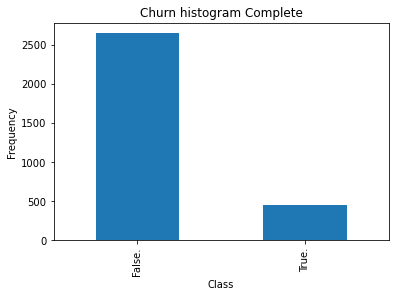

time: 297 ms (started: 2021-08-17 00:00:46 -03:00)


In [12]:
pd.value_counts(datos_churn_f1['Churn_complete']).plot.bar()
plt.title('Churn histogram Complete')
plt.xlabel('Class')
plt.ylabel('Frequency')
datos_churn_f1['Churn_complete'].value_counts()

False.    1599
True.      274
Name: Churn_orig, dtype: int64

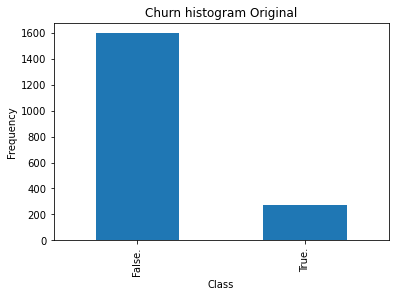

time: 219 ms (started: 2021-08-17 00:00:46 -03:00)


In [13]:
pd.value_counts(datos_churn_f1['Churn_orig']).plot.bar()
plt.title('Churn histogram Original')
plt.xlabel('Class')
plt.ylabel('Frequency')
datos_churn_f1['Churn_orig'].value_counts()

In [14]:
print("Relacion True/False en dataset original: ", 274/1599 )
print("Relacion True/False en dataset completo: ", 448/2651 )

Relacion True/False en dataset original:  0.1713570981863665
Relacion True/False en dataset completo:  0.16899283289324782
time: 0 ns (started: 2021-08-17 00:00:46 -03:00)


### Gráficos categóricos

<AxesSubplot:title={'center':'Count of clients who churn according to the state'}, xlabel='State', ylabel='count'>

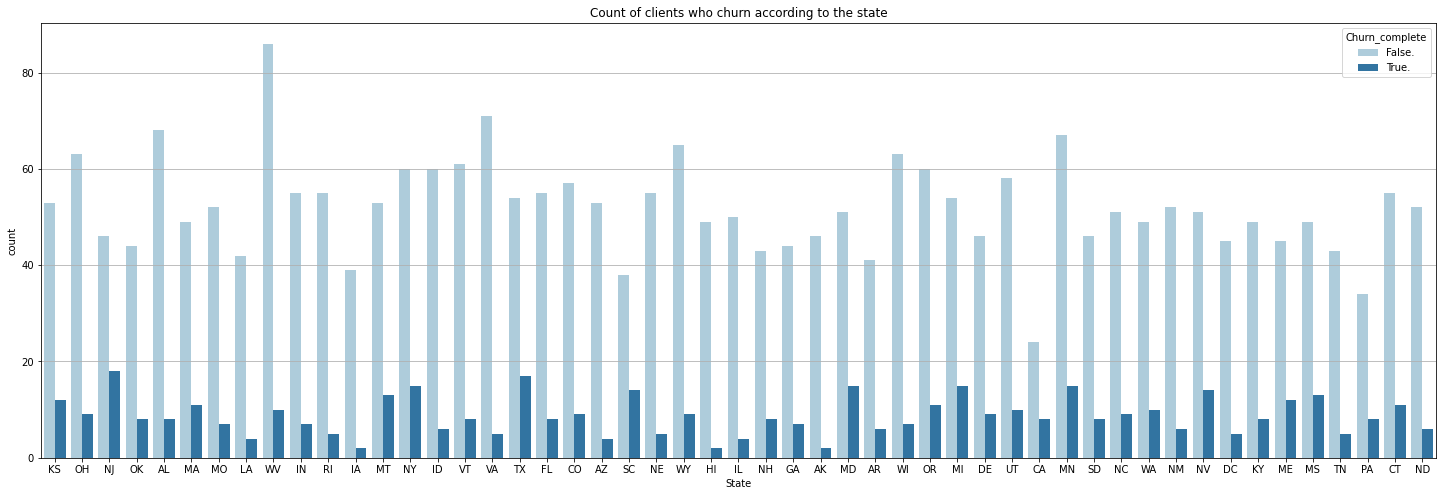

time: 1.75 s (started: 2021-08-17 00:00:46 -03:00)


In [15]:
# Analysis of people who took the car insurance according to their job type
fig = plt.figure(figsize=(25,8))


plt.title('Count of clients who churn according to the state')
plt.grid()
sns.countplot(data = datos_churn_f1, x="State",hue="Churn_complete", log= False, palette='Paired')

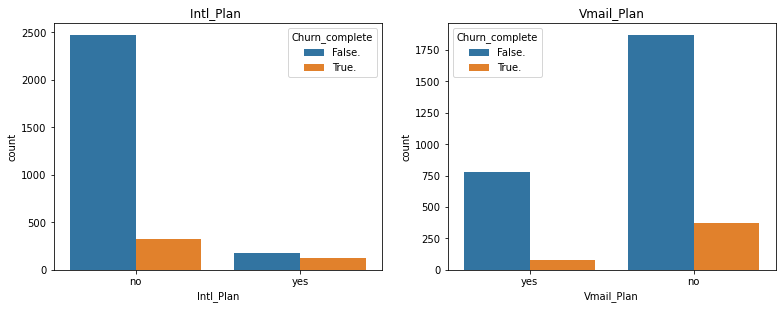

time: 406 ms (started: 2021-08-17 00:00:48 -03:00)


In [16]:
fig = plt.figure(figsize=(20,10))


#  subplot #5
plt.subplot(235)
plt.title('Intl_Plan ')
sns.countplot(x="Intl_Plan", data= datos_churn_f1, hue= "Churn_complete")

#  subplot #6
plt.subplot(236)
plt.title('Vmail_Plan')
#sns.distplot(train_data.Outcome, hue= "car_insurance")
sns.countplot(x="Vmail_Plan", data= datos_churn_f1, hue= "Churn_complete")


plt.show()


## Cuantitativos

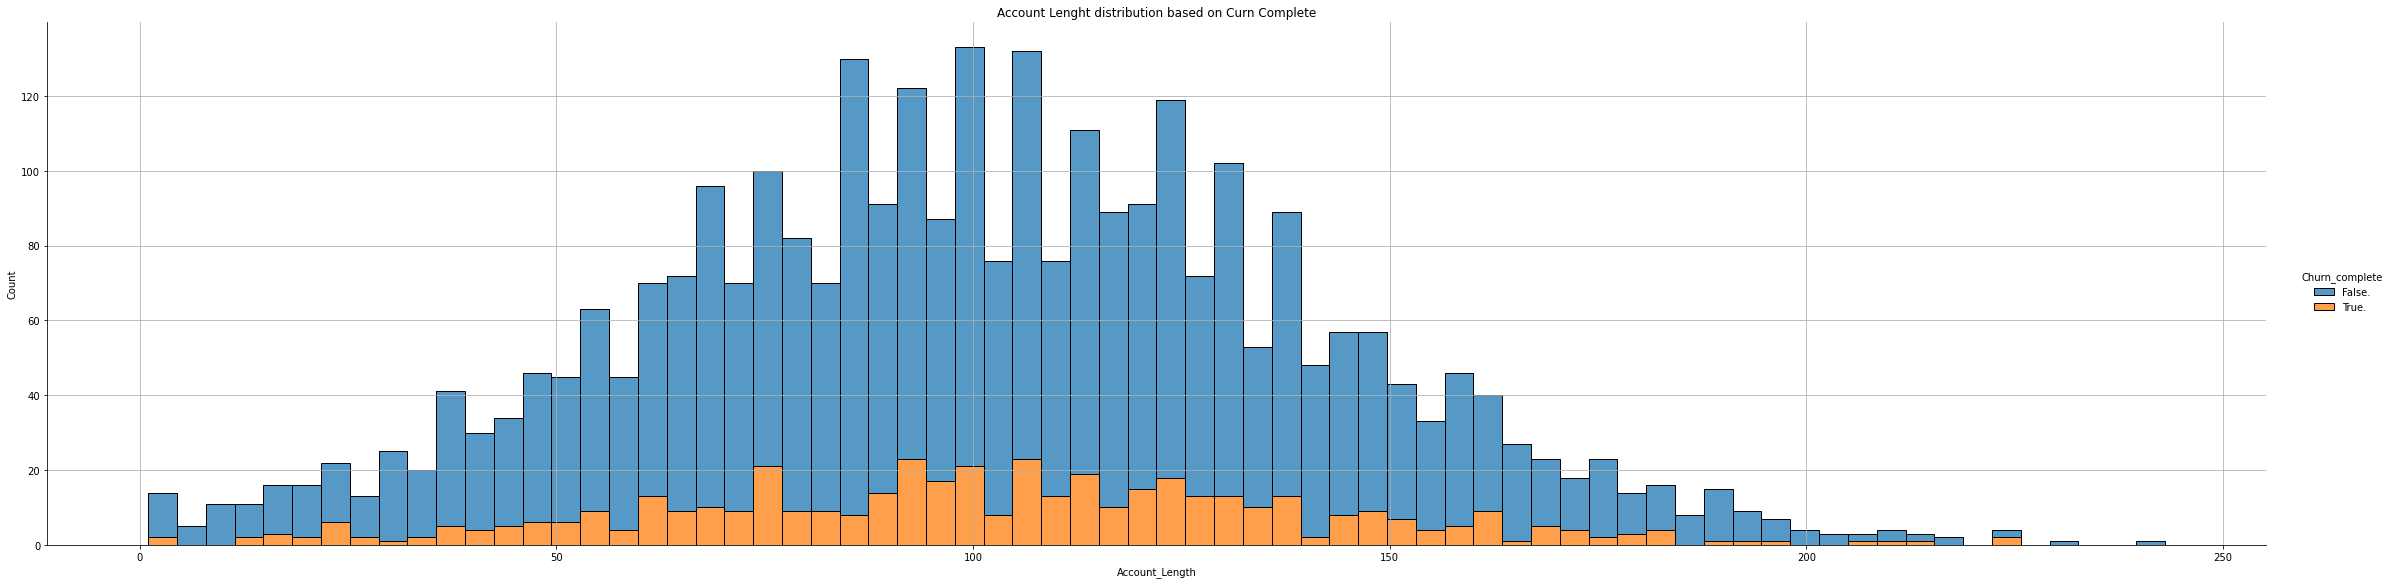

time: 797 ms (started: 2021-08-17 00:00:48 -03:00)


In [17]:
# ACCOUNT LENGHT
sns.displot(datos_churn_f1, x="Account_Length", hue= 'Churn_complete', bins=70, height=8, aspect=4/1, multiple="stack")
plt.title('Account Lenght distribution based on Curn Complete')
plt.grid()

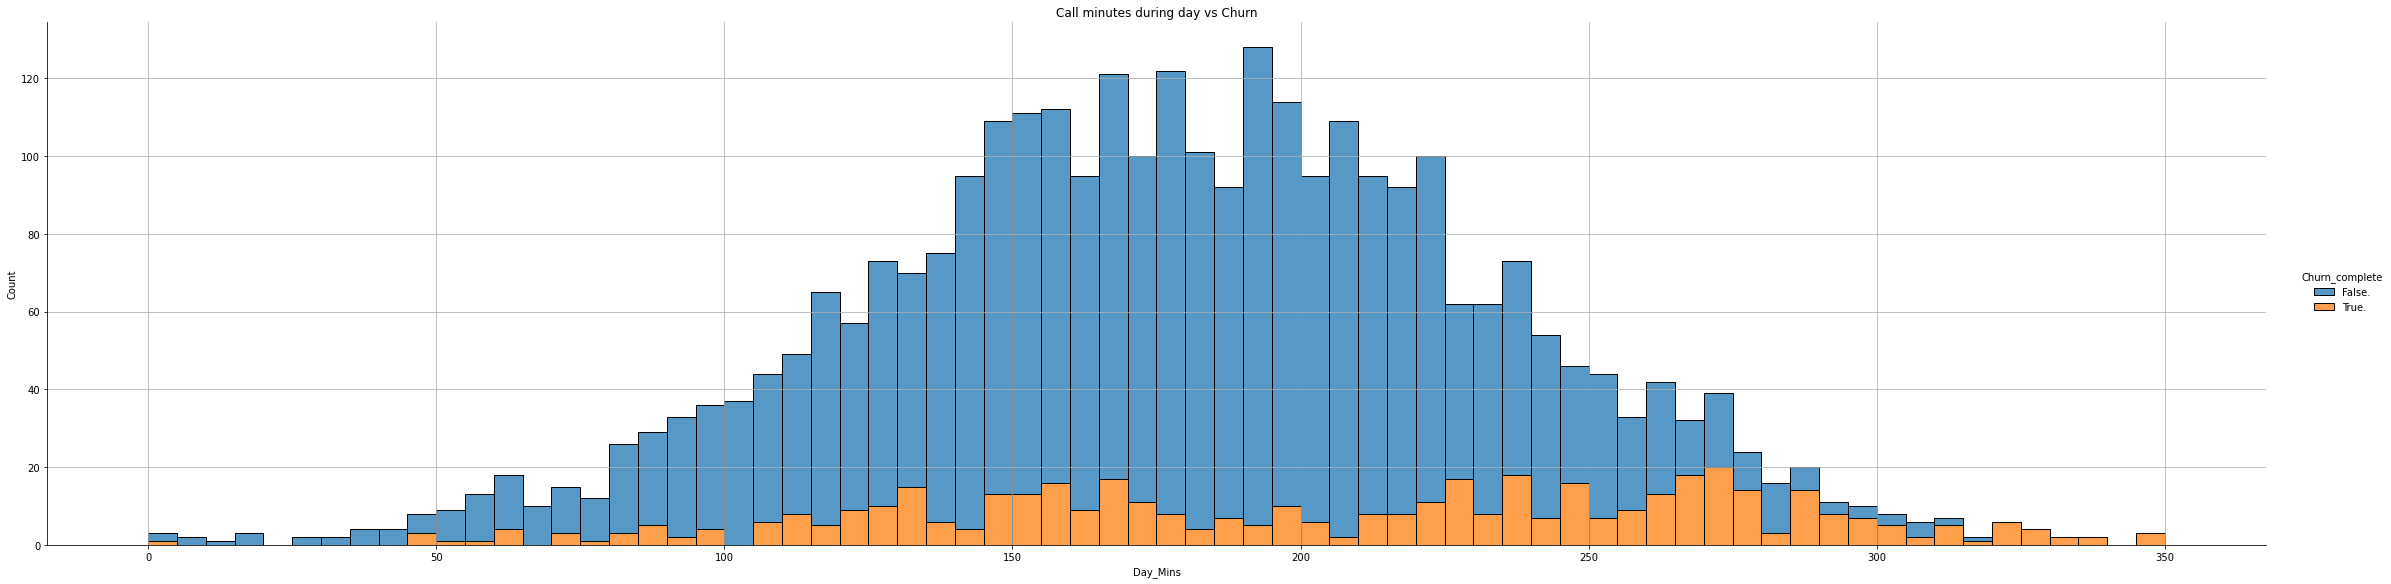

time: 891 ms (started: 2021-08-17 00:00:49 -03:00)


In [18]:
# DAY MINS
sns.displot(datos_churn_f1, x="Day_Mins", hue= 'Churn_complete', bins=70, height=8, aspect=4/1, multiple="stack")
plt.title('Call minutes during day vs Churn')
plt.grid()

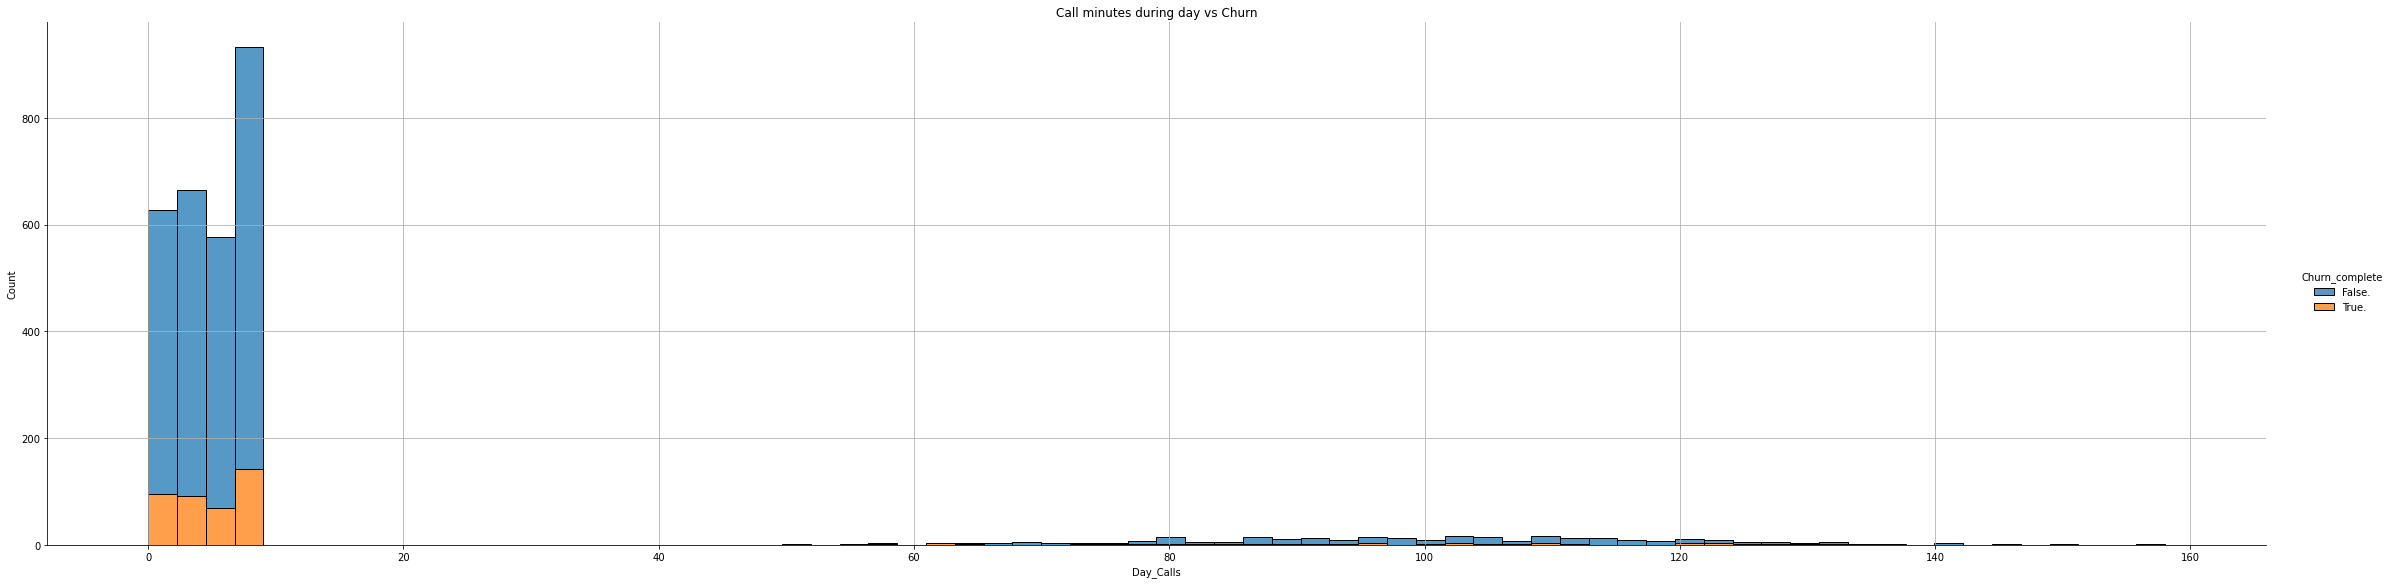

time: 968 ms (started: 2021-08-17 00:00:50 -03:00)


In [19]:
# DAY CALLS
sns.displot(datos_churn_f1, x="Day_Calls", hue= 'Churn_complete', bins=70, height=8, aspect=4/1, multiple="stack")
plt.title('Call minutes during day vs Churn')
plt.grid()

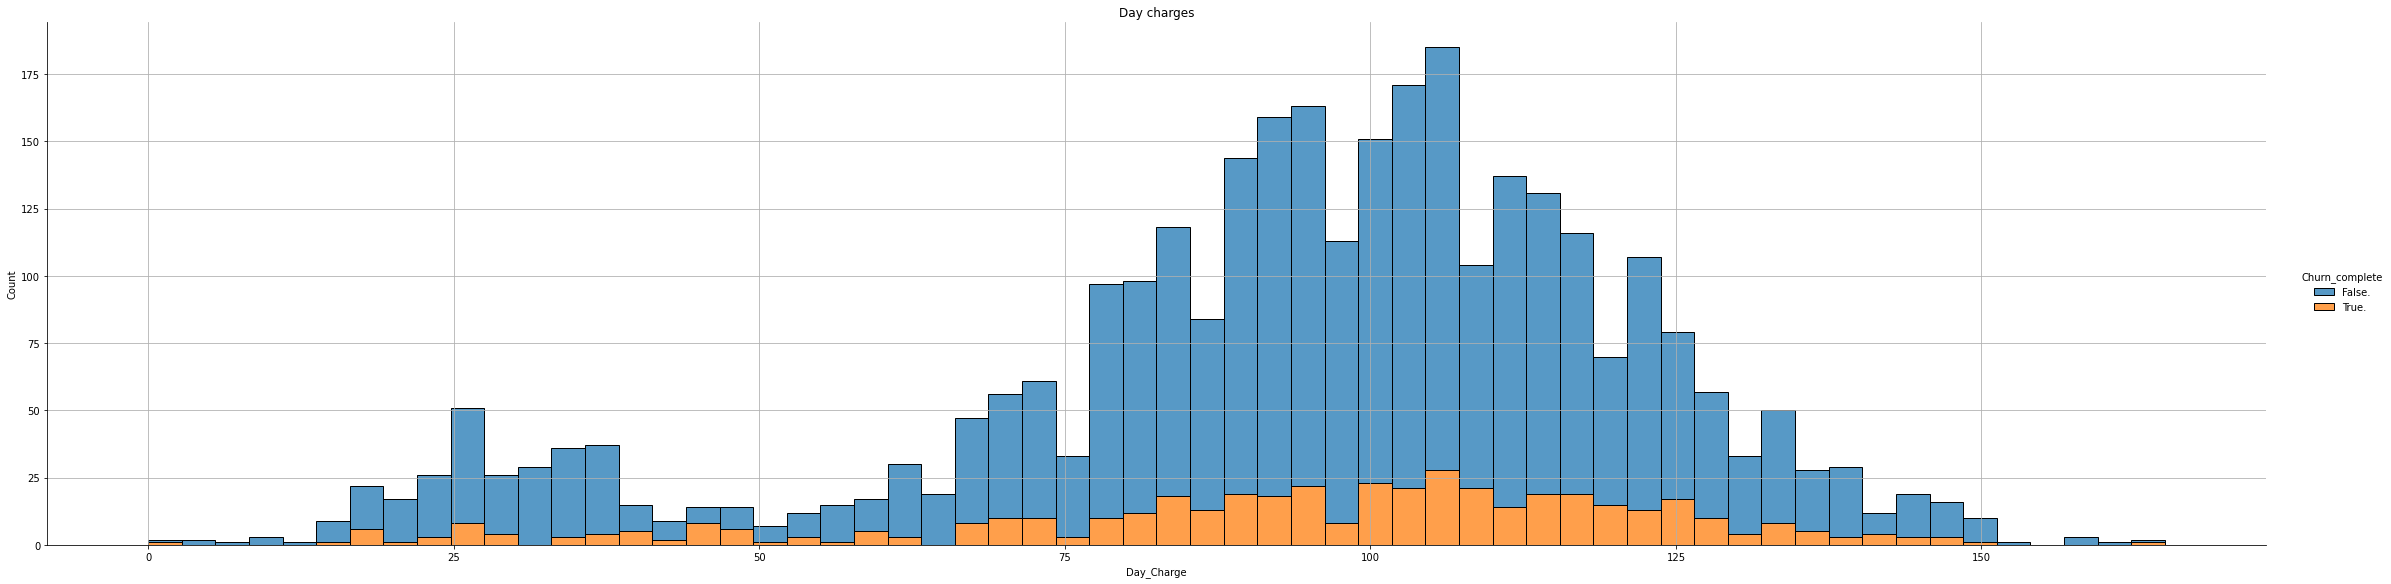

time: 953 ms (started: 2021-08-17 00:00:51 -03:00)


In [20]:
# DAY CHARGE
sns.displot(datos_churn_f1, x="Day_Charge", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Day charges')
plt.grid()


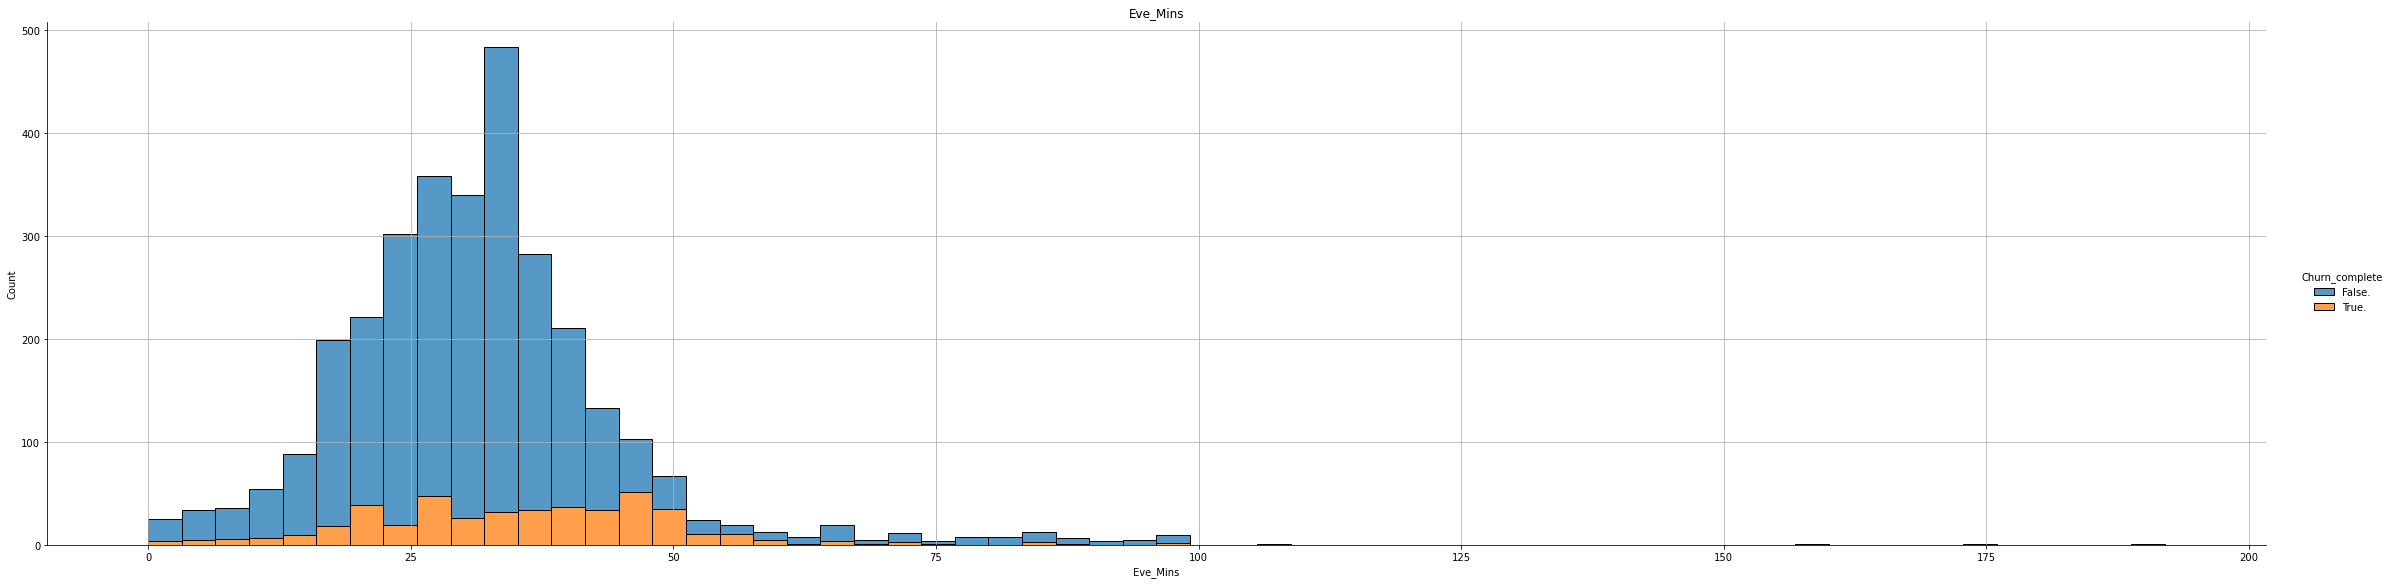

time: 797 ms (started: 2021-08-17 00:00:52 -03:00)


In [21]:
# EVENING MINS
sns.displot(datos_churn_f1, x="Eve_Mins", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Eve_Mins')
plt.grid()


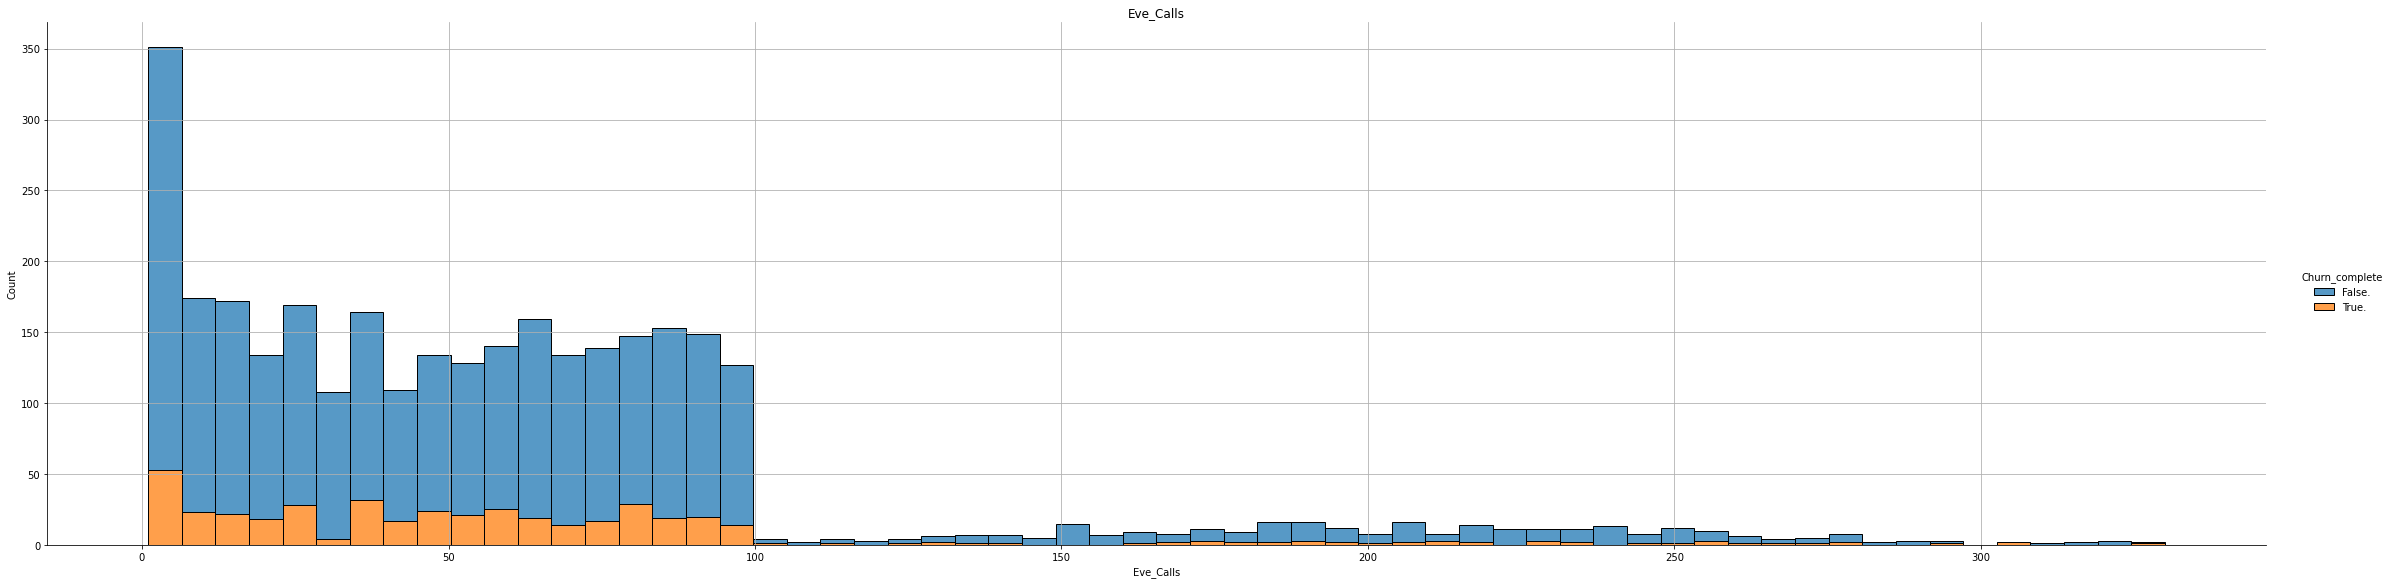

time: 859 ms (started: 2021-08-17 00:00:53 -03:00)


In [22]:
# EVENING CALLS
sns.displot(datos_churn_f1, x="Eve_Calls", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Eve_Calls')
plt.grid()


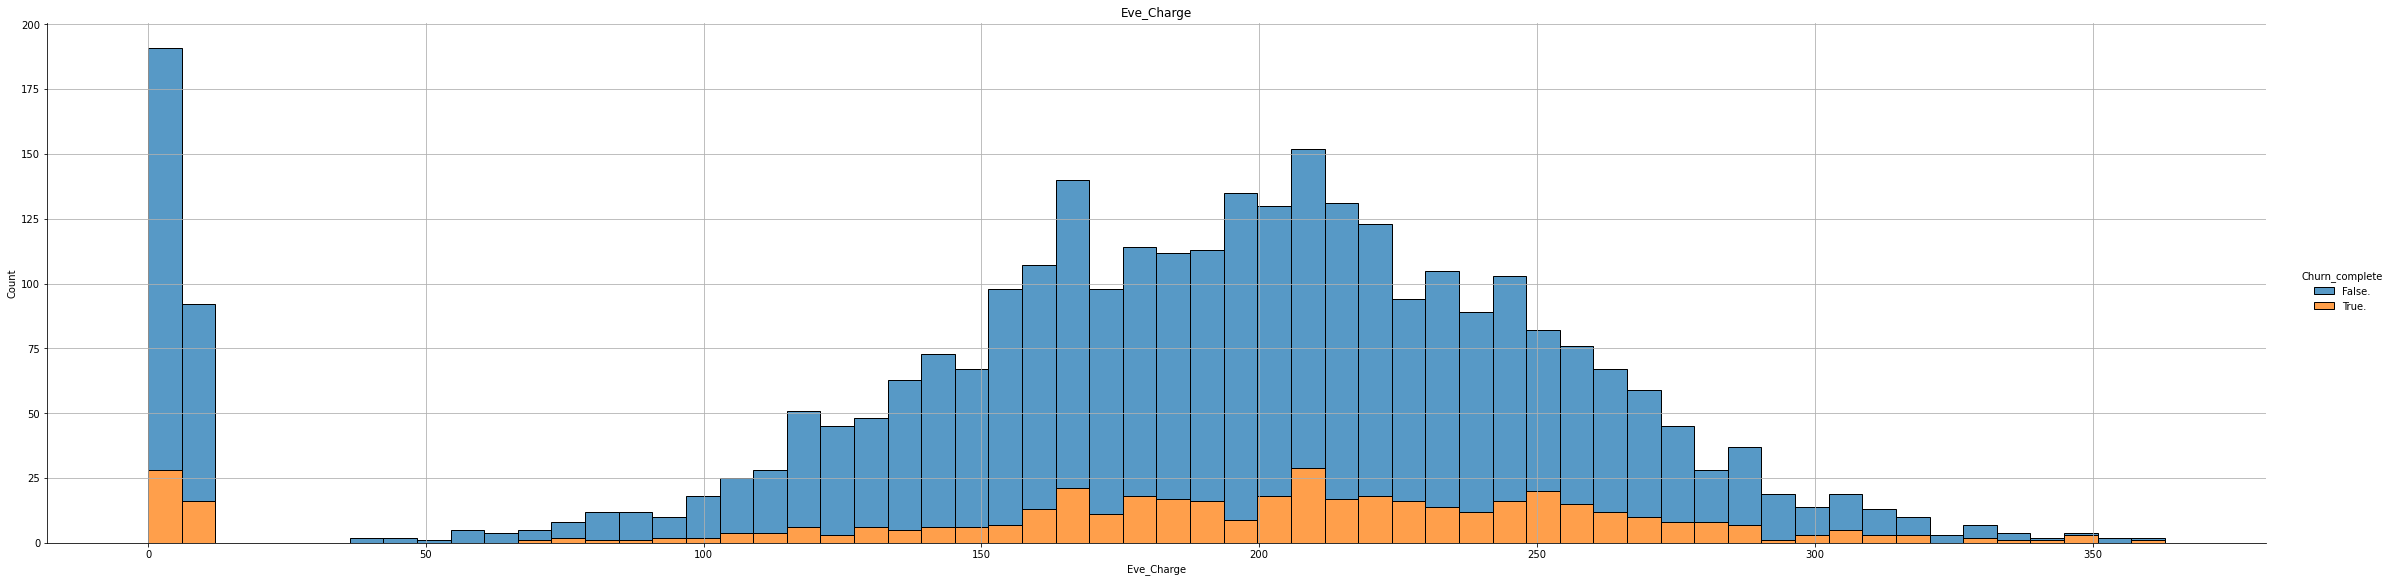

time: 1.03 s (started: 2021-08-17 00:00:54 -03:00)


In [23]:
# EVENING CHARGE
sns.displot(datos_churn_f1, x="Eve_Charge", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Eve_Charge')
plt.grid()

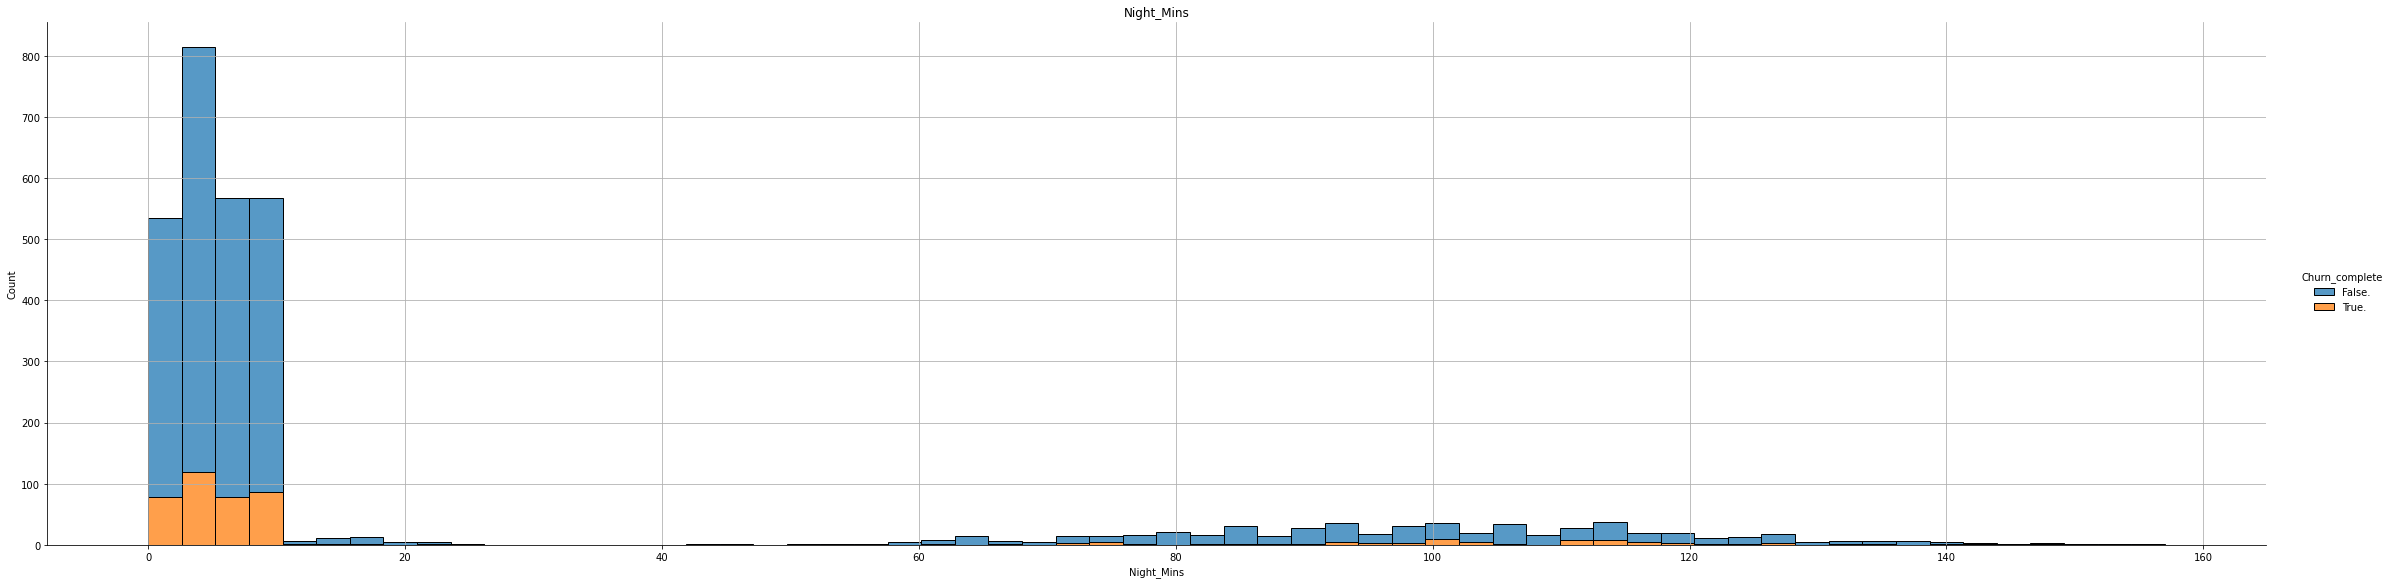

time: 859 ms (started: 2021-08-17 00:00:55 -03:00)


In [24]:
# NIGHT MINS
sns.displot(datos_churn_f1, x="Night_Mins", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Night_Mins')
plt.grid()

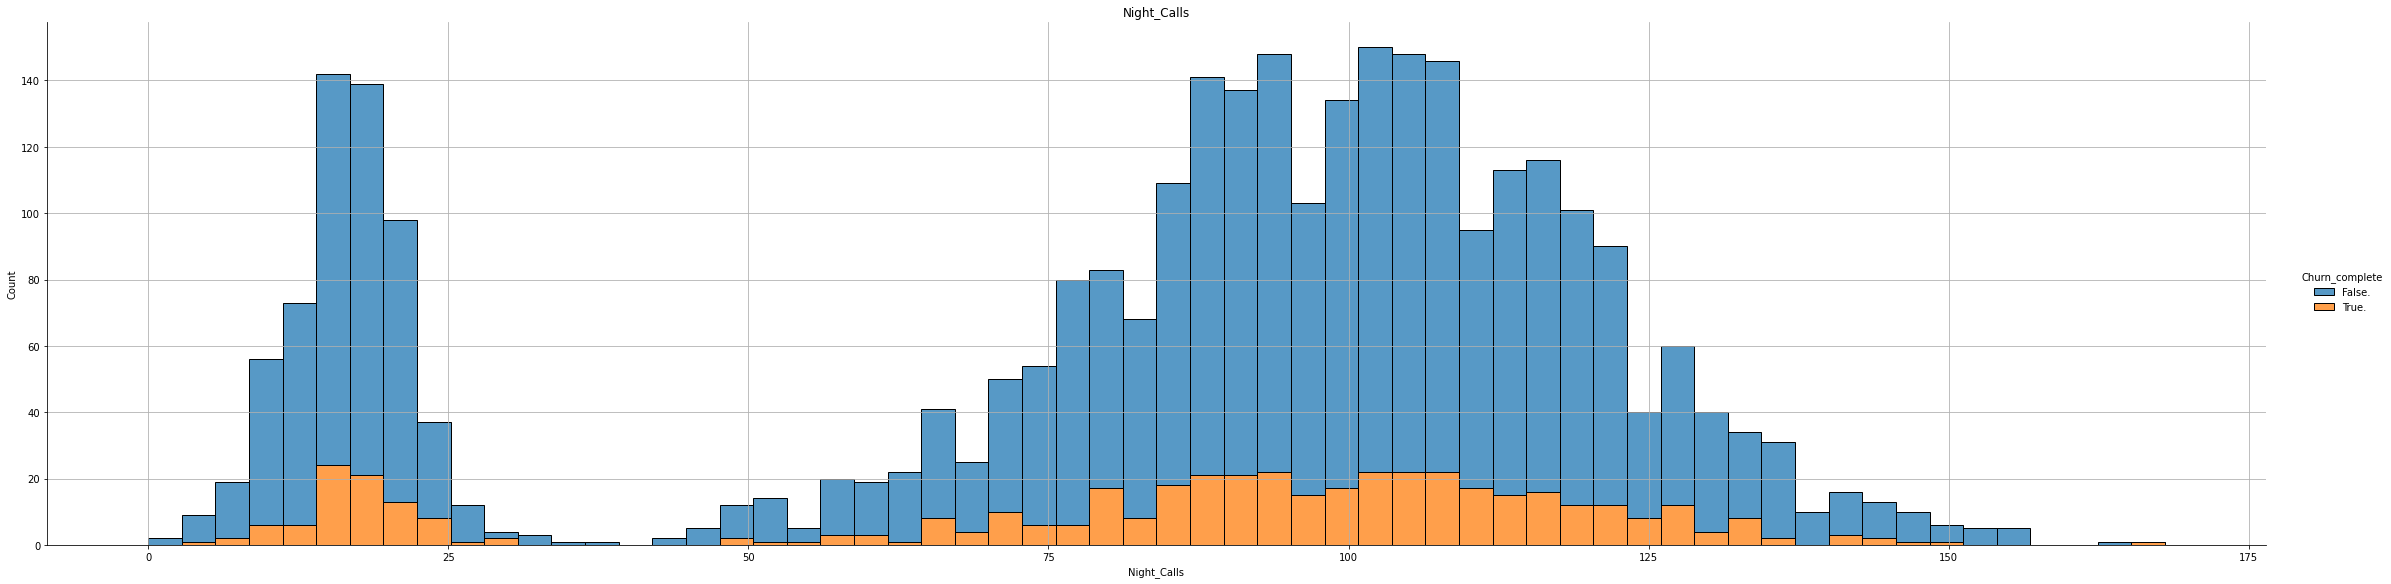

time: 1.05 s (started: 2021-08-17 00:00:56 -03:00)


In [25]:
# NIGHT CALLS
sns.displot(datos_churn_f1, x="Night_Calls", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Night_Calls')
plt.grid()

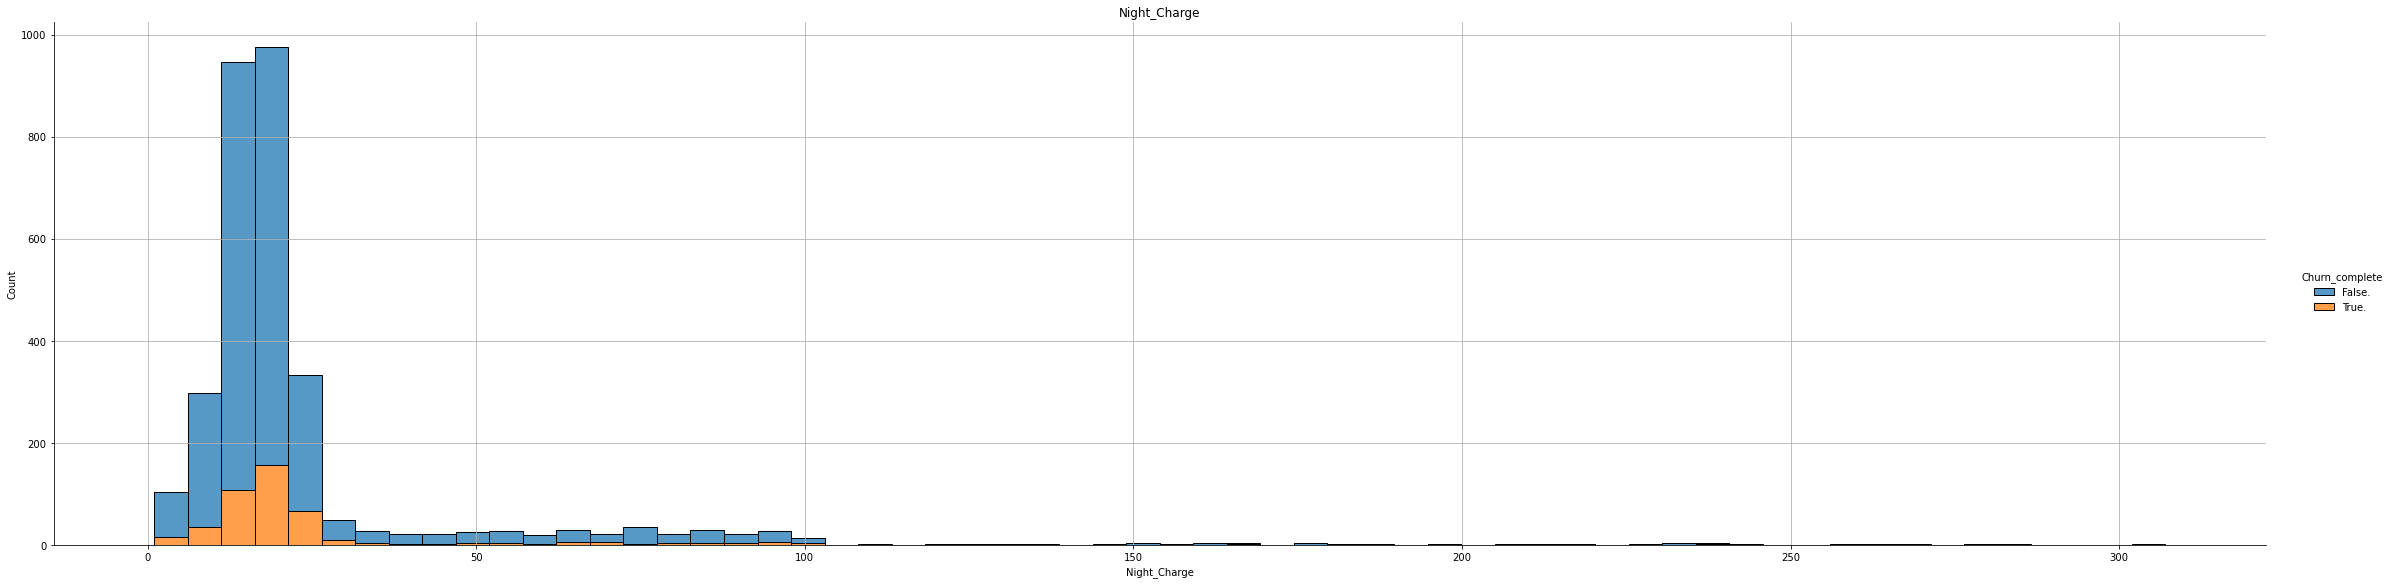

time: 828 ms (started: 2021-08-17 00:00:57 -03:00)


In [26]:
# NIGHT CHARGE
sns.displot(datos_churn_f1, x="Night_Charge", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Night_Charge')
plt.grid()

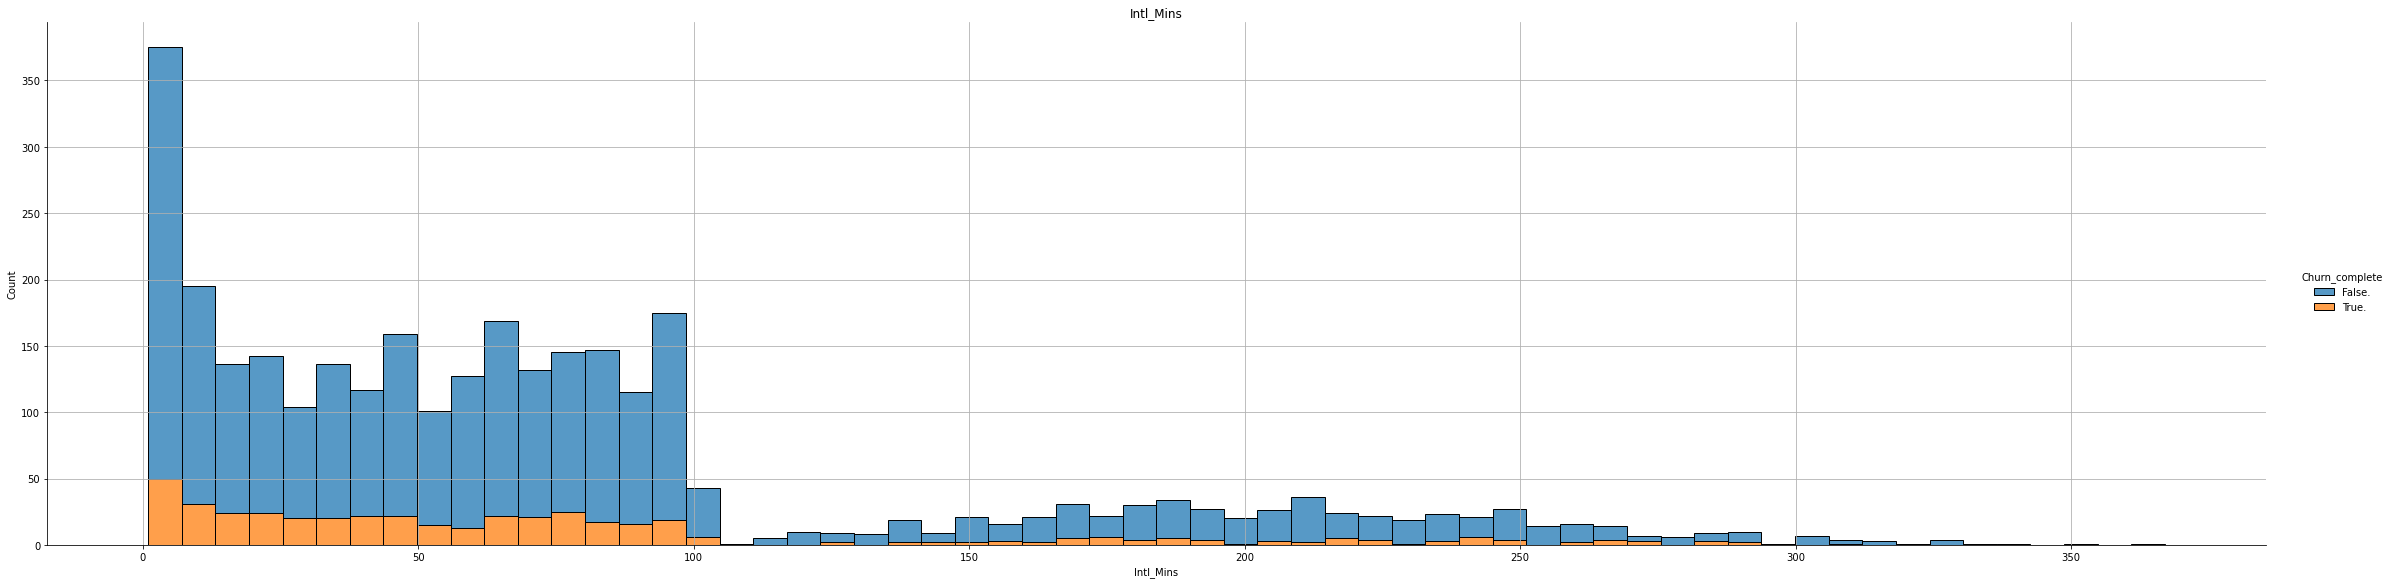

time: 828 ms (started: 2021-08-17 00:00:57 -03:00)


In [27]:
# INTERNATIONAL MINS
sns.displot(datos_churn_f1, x="Intl_Mins", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Intl_Mins')
plt.grid()

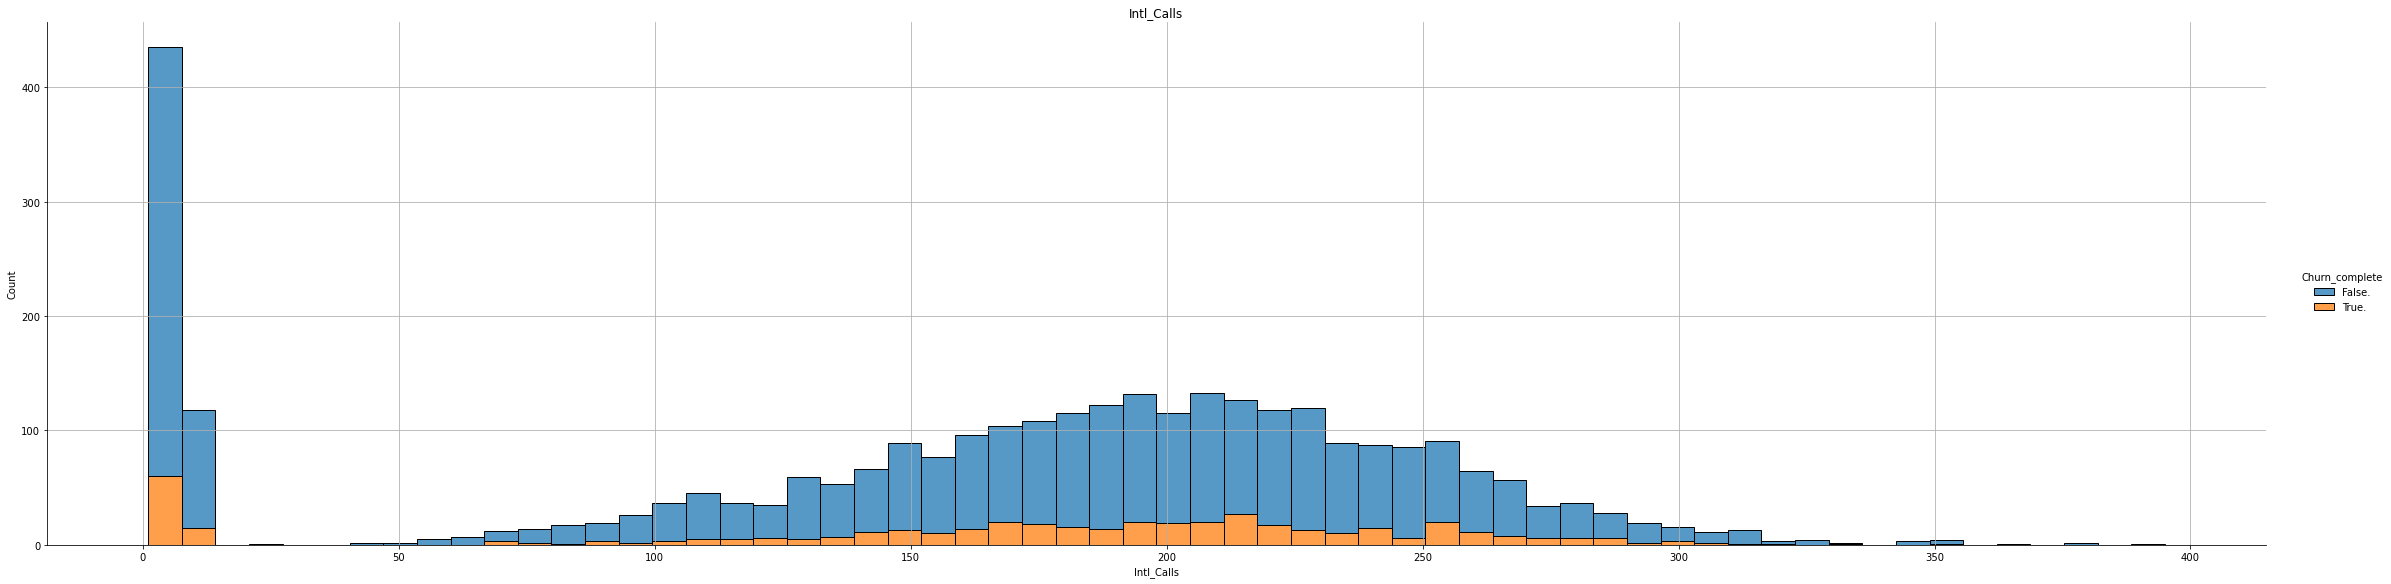

time: 844 ms (started: 2021-08-17 00:00:58 -03:00)


In [28]:
# INTERNATIONAL CALLS
sns.displot(datos_churn_f1, x="Intl_Calls", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Intl_Calls')
plt.grid()

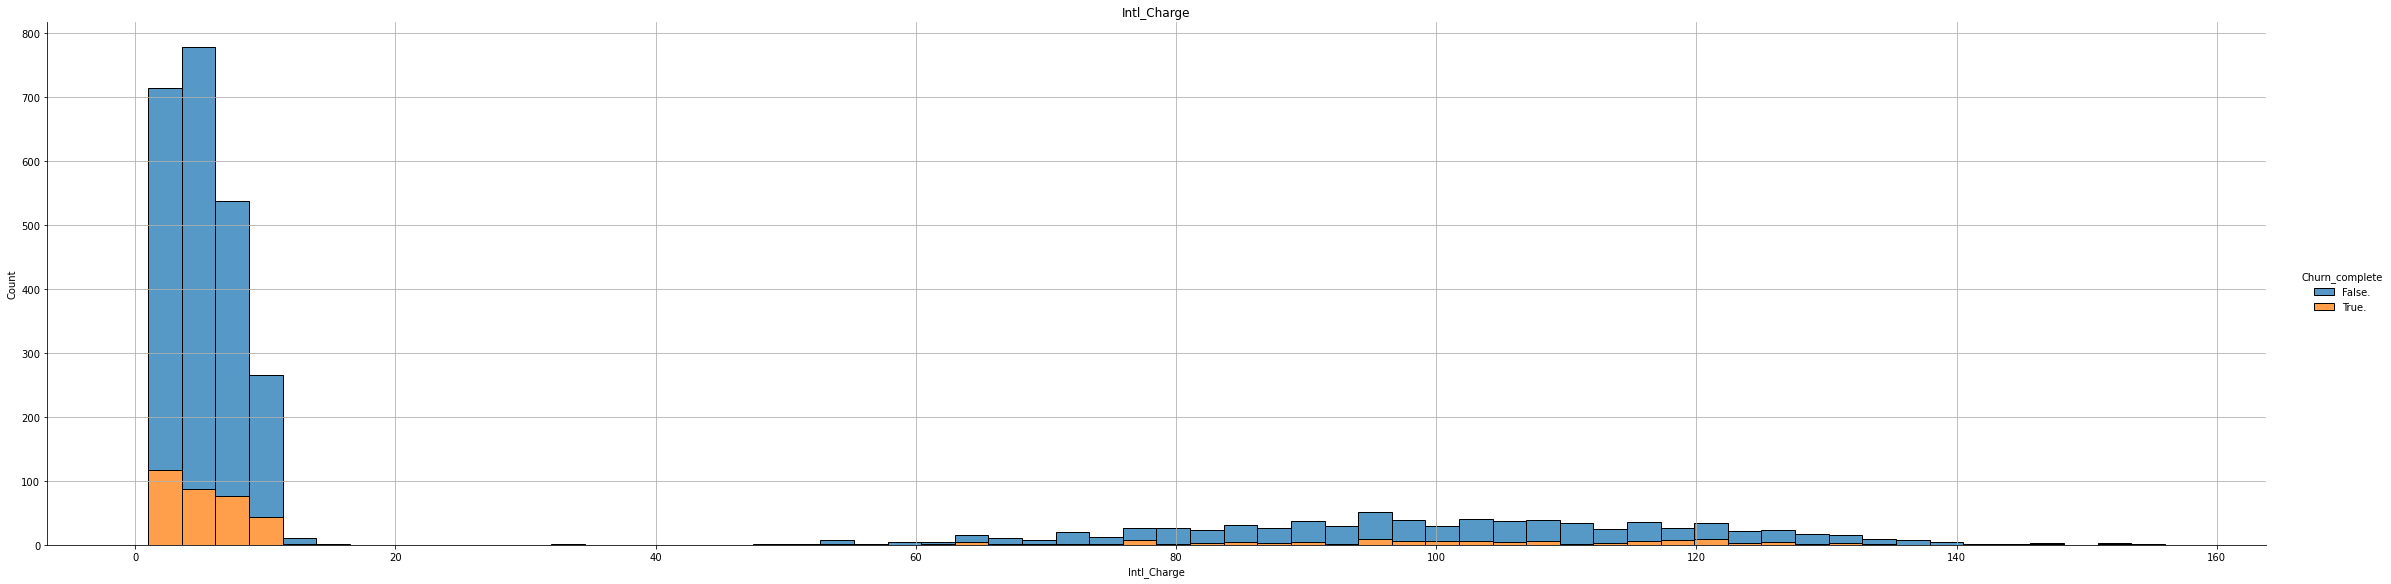

time: 969 ms (started: 2021-08-17 00:00:59 -03:00)


In [29]:
# INTERNATIONAL CHARGE
sns.displot(datos_churn_f1, x="Intl_Charge", hue= 'Churn_complete', bins=60, height=8, aspect=4/1, multiple="stack")
plt.title('Intl_Charge')
plt.grid()

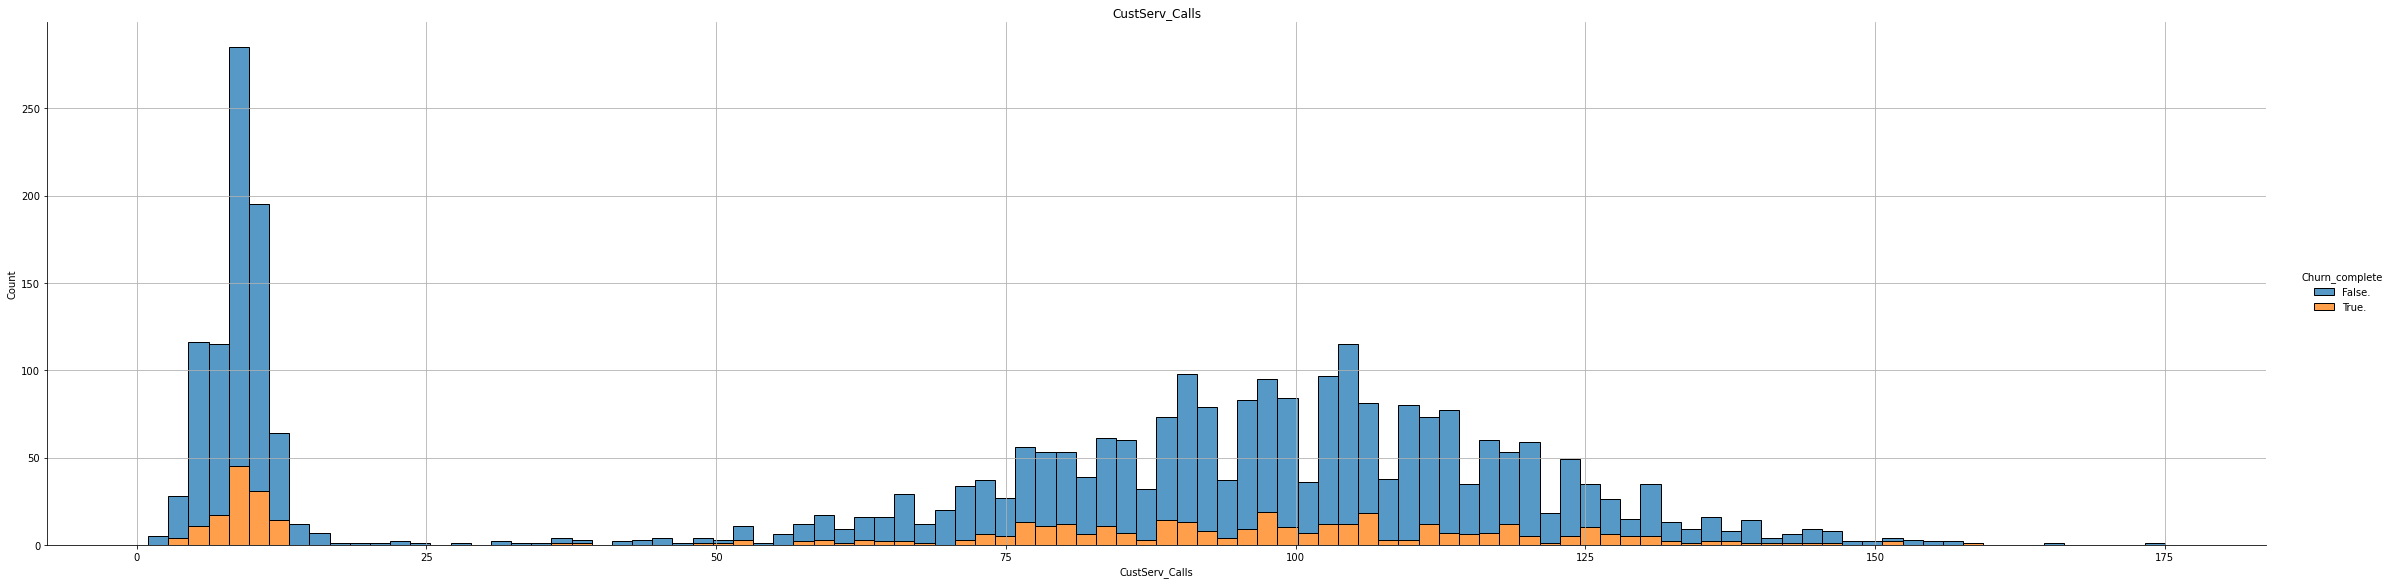

time: 1.08 s (started: 2021-08-17 00:01:00 -03:00)


In [30]:
# Curstomer service calls
sns.displot(datos_churn_f1, x="CustServ_Calls", hue= 'Churn_complete', bins=100, height=8, aspect=4/1, multiple="stack")
plt.title('CustServ_Calls')
plt.grid()

## Proportion Analysis

### Table of proportion Intl_plan vs Churn

In [125]:
# Table of proportion Intl_plan vs Churn
Intl_plan = pd.crosstab(index=datos_churn_f1["Churn_complete"], 
                           columns=datos_churn_f1["Intl_Plan"], margins=True)

Intl_plan.columns = ["No","Yes","rowtotal"]
Intl_plan.index= ["No Churn","Churn","coltotal"]

Intl_plan

No  Yes  rowtotal
No Churn  2478  173      2651
Churn      322  126       448
coltotal  2800  299      3099

time: 62 ms (started: 2021-08-17 19:35:35 -03:00)


In [136]:
Intl_plan.div(Intl_plan["rowtotal"],axis=0)

No       Yes  rowtotal
No Churn  0.934742  0.065258       1.0
Churn     0.718750  0.281250       1.0
coltotal  0.903517  0.096483       1.0

time: 16 ms (started: 2021-08-17 19:47:19 -03:00)


___
___

### Table of proportion Vmail_plan vs Churn

In [126]:
# Table of proportion Vmail_plan vs Churn
Vmail_Plan = pd.crosstab(index=datos_churn_f1["Churn_complete"], 
                           columns=datos_churn_f1["Vmail_Plan"], margins=True)

Vmail_Plan.columns = ["No","Yes","rowtotal"]
Vmail_Plan.index= ["No Churn","Churn","coltotal"]

Vmail_Plan

No  Yes  rowtotal
No Churn  1872  779      2651
Churn      372   76       448
coltotal  2244  855      3099

time: 47 ms (started: 2021-08-17 19:36:08 -03:00)


In [138]:
Vmail_Plan.div(Vmail_Plan["rowtotal"],axis=0)

No       Yes  rowtotal
No Churn  0.706149  0.293851       1.0
Churn     0.830357  0.169643       1.0
coltotal  0.724105  0.275895       1.0

time: 16 ms (started: 2021-08-17 19:49:25 -03:00)


___
___

### Table of proportion Area_Code vs Churn

In [127]:
# Table of proportion Area_Code vs Churn
Area_Code = pd.crosstab(index=datos_churn_f1["Churn_complete"], 
                           columns=datos_churn_f1["Area_Code"], margins=True)

Area_Code.columns = ["Area 408","Area 415","Area 510","rowtotal"]
Area_Code.index= ["No Churn","Churn","coltotal"]

Area_Code

Area 408  Area 415  Area 510  rowtotal
No Churn       659      1327       665      2651
Churn          116       216       116       448
coltotal       775      1543       781      3099

time: 78 ms (started: 2021-08-17 19:37:15 -03:00)


In [139]:
Area_Code.div(Area_Code["rowtotal"],axis=0)

Area 408  Area 415  Area 510  rowtotal
No Churn  0.248585  0.500566  0.250849       1.0
Churn     0.258929  0.482143  0.258929       1.0
coltotal  0.250081  0.497903  0.252017       1.0

time: 15 ms (started: 2021-08-17 19:50:32 -03:00)


___
___

### Table of proportion State_Code vs Churn

In [130]:
# Table of proportion Area_Code vs Churn
State = pd.crosstab(index=datos_churn_f1["Churn_complete"], 
                           columns=datos_churn_f1["State"], margins=True)

State.columns = ['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND',"rowtotal"]
State.index= ["No Churn","Churn","coltotal"]

pd.set_option("display.max_rows", None, "display.max_columns", None)

State

KS  OH  NJ  OK  AL  MA  MO  LA  WV  IN  RI  IA  MT  NY  ID  VT  VA  \
No Churn  46  68  41  53  24  57  55  45  46  55  44  49  39  60  50  55  53   
Churn      2   8   6   4   8   9  11   5   9   8   7   2   2   6   4   7  12   
coltotal  48  76  47  57  32  66  66  50  55  63  51  51  41  66  54  62  65   

          TX  FL  CO  AZ  SC  NE  WY  HI  IL  NH  GA  AK  MD  AR  WI  OR  MI  \
No Churn  49  42  49  51  45  54  67  52  49  53  51  52  55  43  46  52  51   
Churn      8   4  11  15  12  15  15   7  13  13   9   6   5   8  18   6  14   
coltotal  57  46  60  66  57  69  82  59  62  66  60  58  60  51  64  58  65   

          DE  UT  CA  MN  SD  NC  WA  NM  NV  DC  KY  ME  MS  TN  PA  CT  ND  \
No Churn  60  63  44  60  34  55  38  46  43  54  58  71  61  49  63  86  65   
Churn     15   9   8  11   8   5  14   8   5  17  10   5   8  10   7  10   9   
coltotal  75  72  52  71  42  60  52  54  48  71  68  76  69  59  70  96  74   

          rowtotal  
No Churn      2651  
Churn          448  
coltotal      3099

time: 141 ms (started: 2021-08-17 19:39:09 -03:00)


In [140]:
State.div(State["rowtotal"],axis=0)

KS        OH        NJ        OK        AL        MA  \
No Churn  0.017352  0.025651  0.015466  0.019992  0.009053  0.021501   
Churn     0.004464  0.017857  0.013393  0.008929  0.017857  0.020089   
coltotal  0.015489  0.024524  0.015166  0.018393  0.010326  0.021297   

                MO        LA        WV        IN        RI        IA  \
No Churn  0.020747  0.016975  0.017352  0.020747  0.016598  0.018484   
Churn     0.024554  0.011161  0.020089  0.017857  0.015625  0.004464   
coltotal  0.021297  0.016134  0.017748  0.020329  0.016457  0.016457   

                MT        NY        ID        VT        VA        TX  \
No Churn  0.014711  0.022633  0.018861  0.020747  0.019992  0.018484   
Churn     0.004464  0.013393  0.008929  0.015625  0.026786  0.017857   
coltotal  0.013230  0.021297  0.017425  0.020006  0.020975  0.018393   

                FL        CO        AZ        SC        NE        WY  \
No Churn  0.015843  0.018484  0.019238  0.016975  0.020370  0.025273   
Churn     0.008929  0.024554  0.033482  0.026786  0.033482  0.033482   
coltotal  0.014843  0.019361  0.021297  0.018393  0.022265  0.026460   

                HI        IL        NH        GA        AK        MD  \
No Churn  0.019615  0.018484  0.019992  0.019238  0.019615  0.020747   
Churn     0.015625  0.029018  0.029018  0.020089  0.013393  0.011161   
coltotal  0.019038  0.020006  0.021297  0.019361  0.018716  0.019361   

                AR        WI        OR        MI        DE        UT  \
No Churn  0.016220  0.017352  0.019615  0.019238  0.022633  0.023765   
Churn     0.017857  0.040179  0.013393  0.031250  0.033482  0.020089   
coltotal  0.016457  0.020652  0.018716  0.020975  0.024201  0.023233   

                CA        MN        SD        NC        WA        NM  \
No Churn  0.016598  0.022633  0.012825  0.020747  0.014334  0.017352   
Churn     0.017857  0.024554  0.017857  0.011161  0.031250  0.017857   
coltotal  0.016780  0.022911  0.013553  0.019361  0.016780  0.017425   

                NV        DC        KY        ME        MS        TN  \
No Churn  0.016220  0.020370  0.021879  0.026782  0.023010  0.018484   
Churn     0.011161  0.037946  0.022321  0.011161  0.017857  0.022321   
coltotal  0.015489  0.022911  0.021943  0.024524  0.022265  0.019038   

                PA        CT        ND  rowtotal  
No Churn  0.023765  0.032441  0.024519       1.0  
Churn     0.015625  0.022321  0.020089       1.0  
coltotal  0.022588  0.030978  0.023879       1.0

time: 47 ms (started: 2021-08-17 19:52:02 -03:00)


___
___

In [91]:
datos_churn_f1

State  Account_Length  Area_Code Intl_Plan Vmail_Plan  Vmail_Message  \
0       KS             128        415        no        yes             25   
1       OH             107        415        no        yes             26   
2       NJ             137        415        no         no              0   
3       OH              84        408       yes         no              0   
4       OK              75        415       yes         no              0   
...    ...             ...        ...       ...        ...            ...   
3094    MN              91        415        no         no              0   
3095    AL             181        415        no        yes             27   
3096    CO             118        415        no        yes             36   
3097    ME             112        415        no         no              0   
3098    GA              93        415        no         no              0   

      Day_Mins  Day_Calls  Day_Charge  Eve_Mins  ...  Night_Mins  Night_Calls  \
0          265          1         110        45  ...           4           99   
1          161          6         123        27  ...           5          103   
2          243          4         114        41  ...           2          110   
3          299          4          71        50  ...           9           88   
4          166          7         113        28  ...           3          122   
...        ...        ...         ...       ...  ...         ...          ...   
3094       133          8          61        22  ...           8           96   
3095       190          3          93        32  ...         127           21   
3096       294          9         106        50  ...           7          115   
3097       185          4         114        31  ...           4          119   
3098       179          5         121        30  ...           9          131   

      Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  \
0               16         78         244            7              91   
1               16         62         254            4             103   
2               10          3         162            6             104   
3                5         26         196            9              89   
4               12         61         186            9             121   
...            ...        ...         ...          ...             ...   
3094            13          5         189            6              92   
3095            17        215           7           82               9   
3096            14          8         189            2              63   
3097            16         27         144           78               6   
3098            16         31         165            5             125   

      Churn_orig  Churn_complete Churn_code  
0            NaN          False.          0  
1         False.          False.          0  
2         False.          False.          0  
3         False.          False.          0  
4         False.          False.          0  
...          ...             ...        ...  
3094      False.          False.          0  
3095         NaN          False.          0  
3096      False.          False.          0  
3097         NaN          False.          0  
3098         NaN          False.          0  

[3099 rows x 22 columns]

time: 813 ms (started: 2021-08-17 14:26:48 -03:00)


## Análisis de correlación de variables

### Correlación a pares (Pairplot)

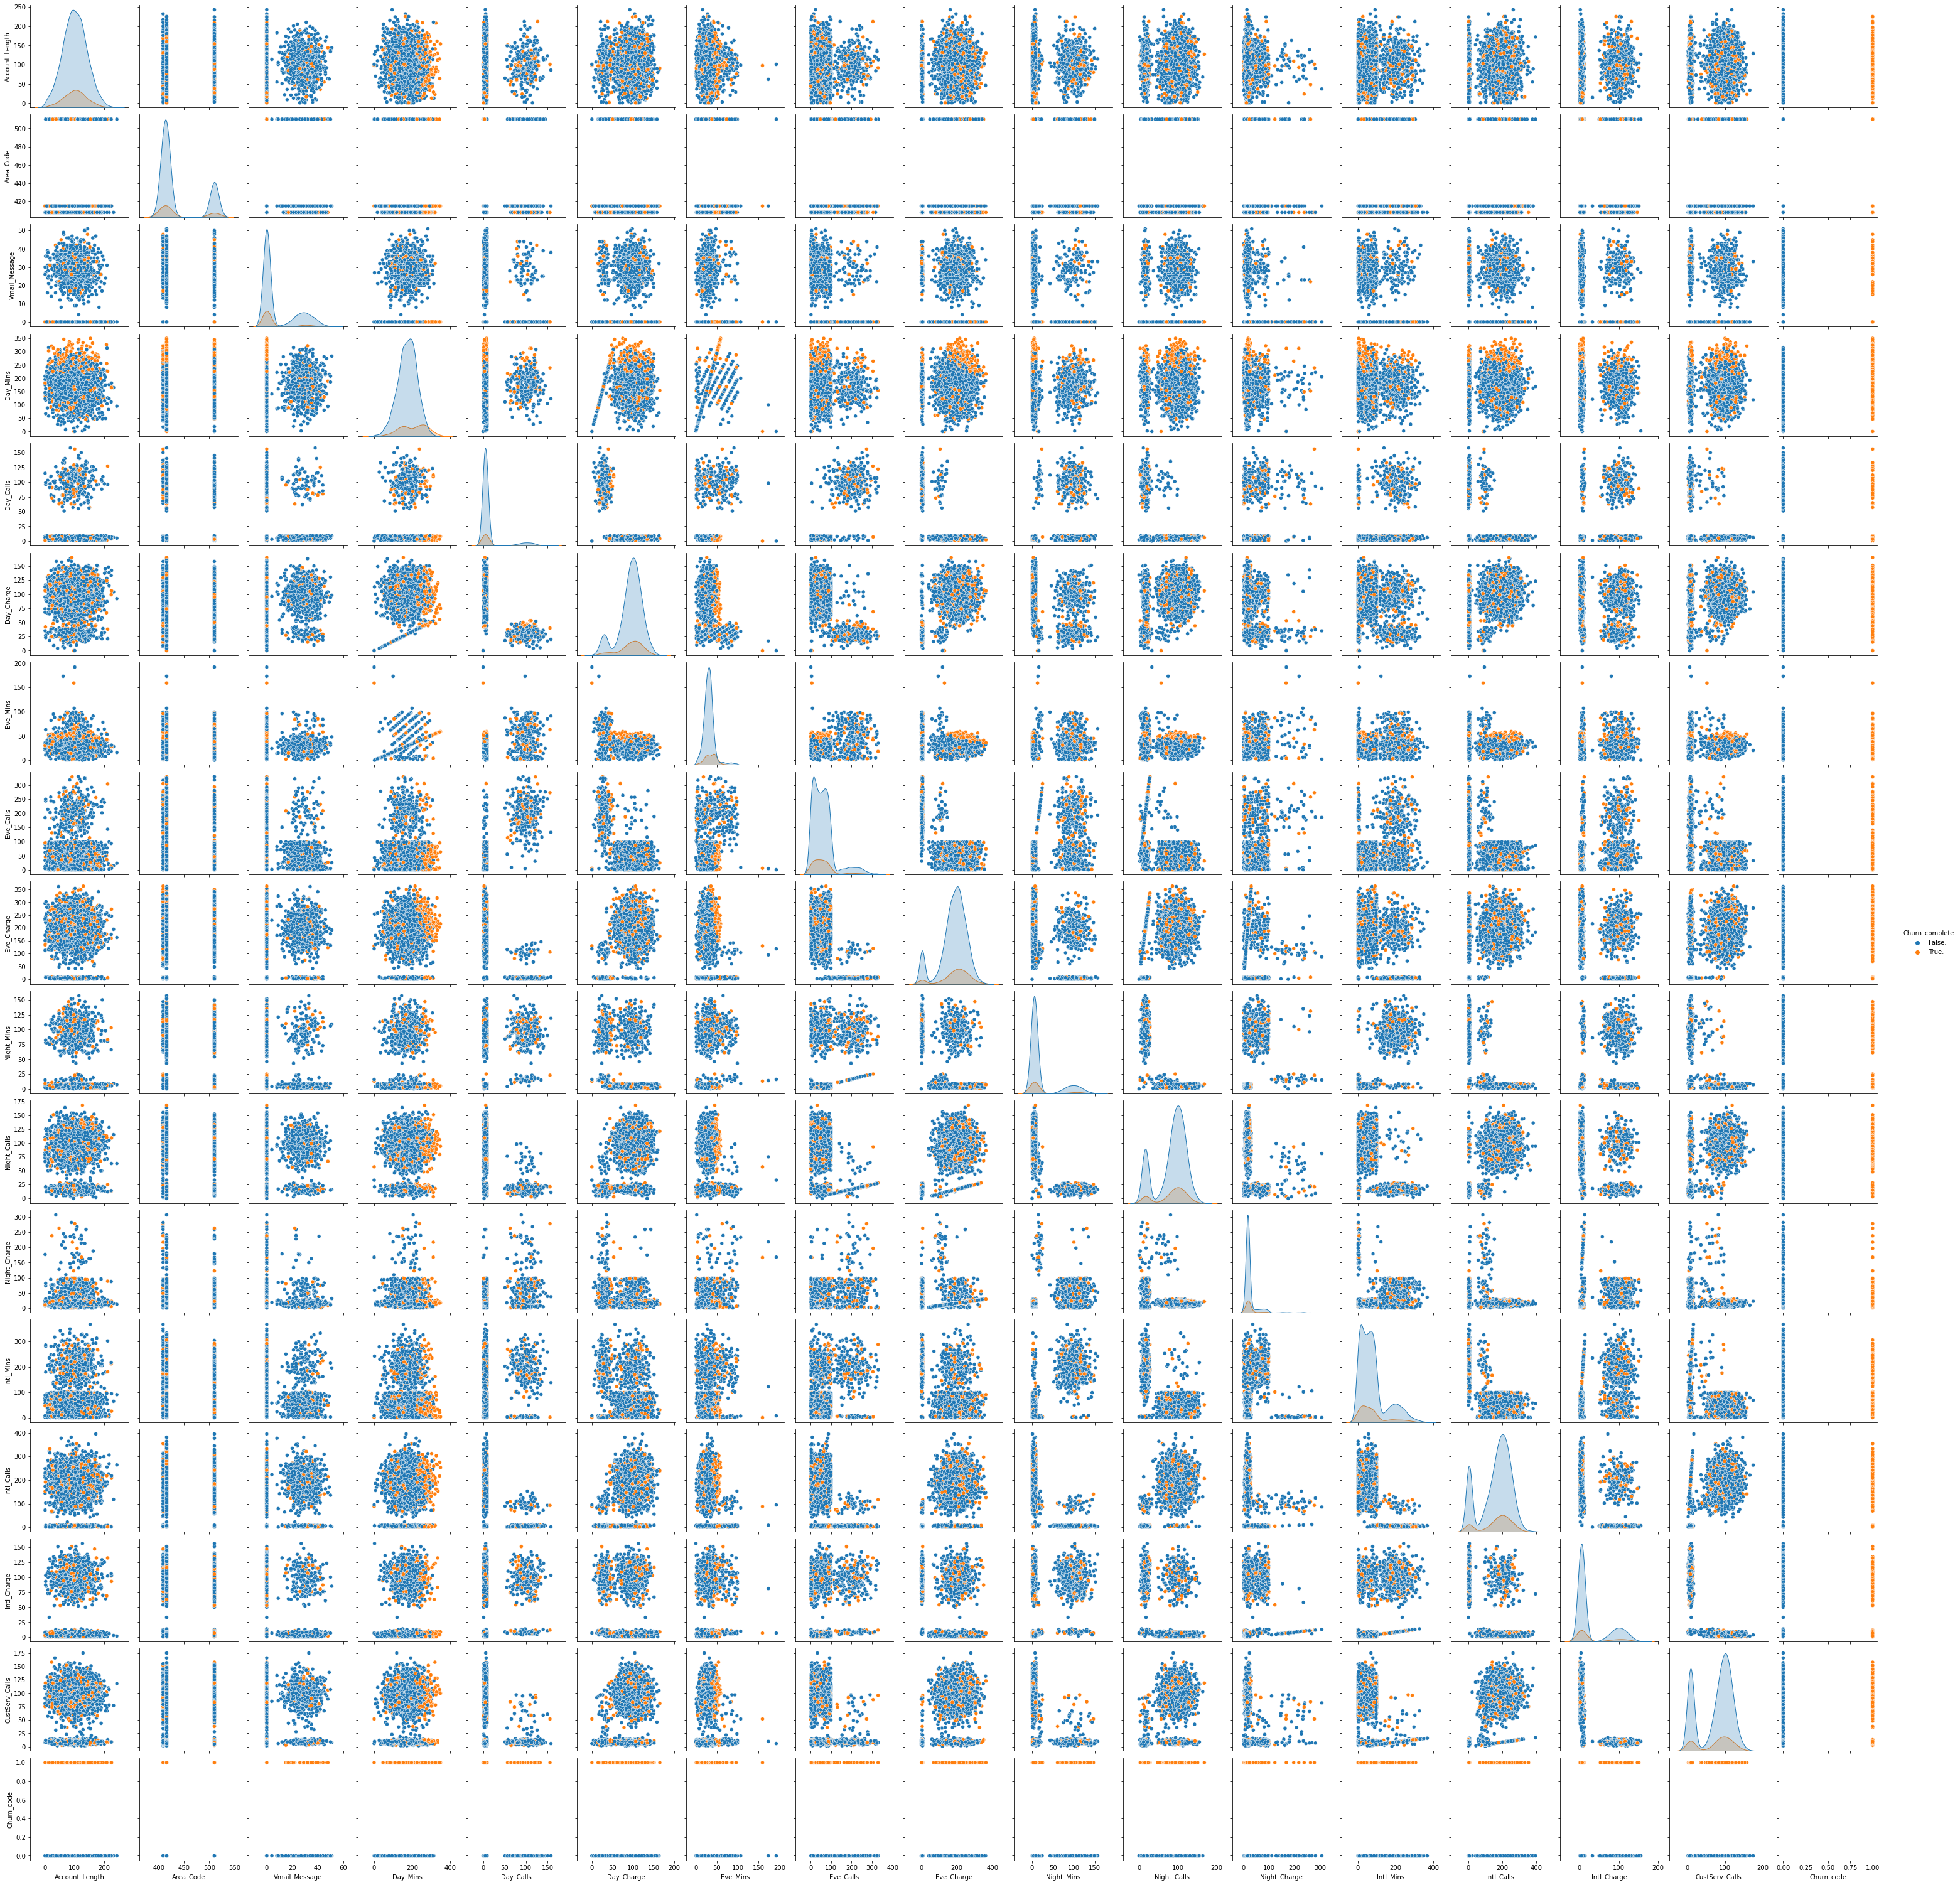

time: 2min 28s (started: 2021-08-17 00:01:01 -03:00)


In [31]:
pares= datos_churn_f1[[ 'Account_Length', 'Area_Code', 
       'Vmail_Message', 
       'Day_Mins', 'Day_Calls', 'Day_Charge', 
       'Eve_Mins','Eve_Calls', 'Eve_Charge', 
       'Night_Mins', 'Night_Calls', 'Night_Charge',
       'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls',
       'Churn_complete','Churn_code']]
sns.pairplot(pares, hue='Churn_complete')
plt.show()

### Matriz de correlación 

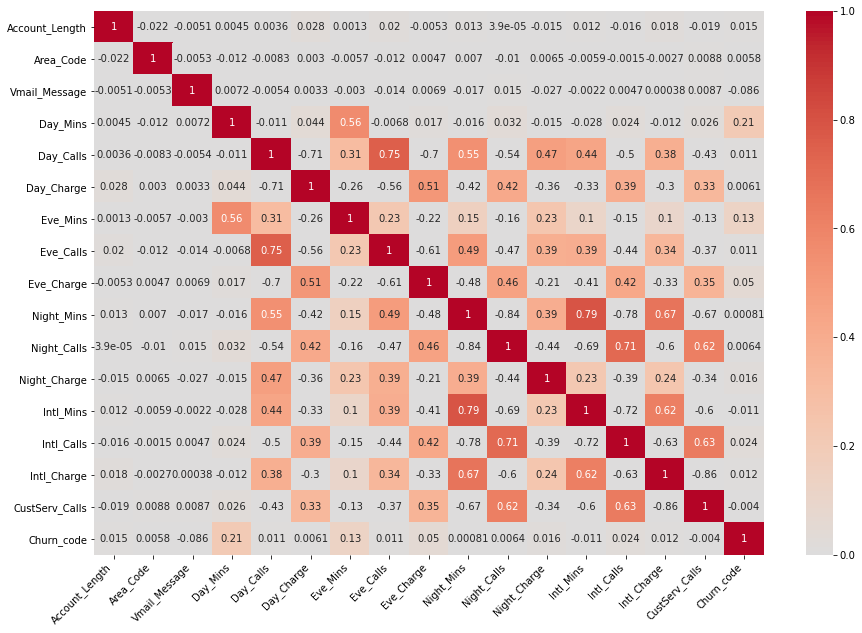

time: 3.66 s (started: 2021-08-17 00:03:30 -03:00)


In [32]:
# Consultamos la matriz de correlación
plt.figure(figsize = (15,10))

matriz= datos_churn_f1[[ 'Account_Length', 'Area_Code', 
       'Vmail_Message', 
       'Day_Mins', 'Day_Calls', 'Day_Charge', 
       'Eve_Mins','Eve_Calls', 'Eve_Charge', 
       'Night_Mins', 'Night_Calls', 'Night_Charge',
       'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls',
       'Churn_complete', 'Churn_code']]
corrMatrix = matriz.corr()
ax= sns.heatmap(corrMatrix,annot = True, vmin=0, vmax=1, center= 0, cmap= 'coolwarm')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#plt.show()

In [33]:
#'State', 'Account_Length', 'Area_Code', 'Intl_Plan', 'Vmail_Plan',
#       'Vmail_Message', 
#       'Day_Mins', 'Day_Calls', 'Day_Charge', 
#       'Eve_Mins','Eve_Calls', 'Eve_Charge', 
#       'Night_Mins', 'Night_Calls', 'Night_Charge',
#       'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
#       'CustServ_Calls',
#       'Churn_orig', 'Churn_complete'

time: 0 ns (started: 2021-08-17 00:03:34 -03:00)


In [34]:
datos_churn_f1

State  Account_Length  Area_Code Intl_Plan Vmail_Plan  Vmail_Message  \
0       KS             128        415        no        yes             25   
1       OH             107        415        no        yes             26   
2       NJ             137        415        no         no              0   
3       OH              84        408       yes         no              0   
4       OK              75        415       yes         no              0   
...    ...             ...        ...       ...        ...            ...   
3094    MN              91        415        no         no              0   
3095    AL             181        415        no        yes             27   
3096    CO             118        415        no        yes             36   
3097    ME             112        415        no         no              0   
3098    GA              93        415        no         no              0   

      Day_Mins  Day_Calls  Day_Charge  Eve_Mins  ...  Night_Mins  Night_Calls  \
0          265          1         110        45  ...           4           99   
1          161          6         123        27  ...           5          103   
2          243          4         114        41  ...           2          110   
3          299          4          71        50  ...           9           88   
4          166          7         113        28  ...           3          122   
...        ...        ...         ...       ...  ...         ...          ...   
3094       133          8          61        22  ...           8           96   
3095       190          3          93        32  ...         127           21   
3096       294          9         106        50  ...           7          115   
3097       185          4         114        31  ...           4          119   
3098       179          5         121        30  ...           9          131   

      Night_Charge  Intl_Mins  Intl_Calls  Intl_Charge  CustServ_Calls  \
0               16         78         244            7              91   
1               16         62         254            4             103   
2               10          3         162            6             104   
3                5         26         196            9              89   
4               12         61         186            9             121   
...            ...        ...         ...          ...             ...   
3094            13          5         189            6              92   
3095            17        215           7           82               9   
3096            14          8         189            2              63   
3097            16         27         144           78               6   
3098            16         31         165            5             125   

      Churn_orig  Churn_complete Churn_code  
0            NaN          False.          0  
1         False.          False.          0  
2         False.          False.          0  
3         False.          False.          0  
4         False.          False.          0  
...          ...             ...        ...  
3094      False.          False.          0  
3095         NaN          False.          0  
3096      False.          False.          0  
3097         NaN          False.          0  
3098         NaN          False.          0  

[3099 rows x 22 columns]

time: 78 ms (started: 2021-08-17 00:03:34 -03:00)


In [35]:
datos_churn_f1.columns

Index(['State', 'Account_Length', 'Area_Code', 'Intl_Plan', 'Vmail_Plan',
       'Vmail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins',
       'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'Intl_Mins', 'Intl_Calls', 'Intl_Charge', 'CustServ_Calls',
       'Churn_orig', 'Churn_complete', 'Churn_code'],
      dtype='object')

time: 16 ms (started: 2021-08-17 00:03:34 -03:00)


## Variables encoding

In [36]:
# Aplicamos el método get_dummies de Pandas para obtener variables binarias de cada categoría de las columnas 'l3' y 'property_type'
datos_churn_encod = pd.get_dummies(datos_churn_f1, columns=['State',"Intl_Plan", "Vmail_Plan"] )
#datos_proper_SPR02_Encod.drop(['l3','property_type'], axis=1)
datos_churn_encod

Account_Length  Area_Code  Vmail_Message  Day_Mins  Day_Calls  \
0                128        415             25       265          1   
1                107        415             26       161          6   
2                137        415              0       243          4   
3                 84        408              0       299          4   
4                 75        415              0       166          7   
...              ...        ...            ...       ...        ...   
3094              91        415              0       133          8   
3095             181        415             27       190          3   
3096             118        415             36       294          9   
3097             112        415              0       185          4   
3098              93        415              0       179          5   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  ...  State_VA  \
0            110        45          7         197           4  ...         0   
1            123        27         47         195           5  ...         0   
2            114        41         38         121           2  ...         0   
3             71        50          9          61           9  ...         0   
4            113        28         34         148           3  ...         0   
...          ...       ...        ...         ...         ...  ...       ...   
3094          61        22         75         158           8  ...         0   
3095          93        32         35         249         127  ...         0   
3096         106        50         13         165           7  ...         0   
3097         114        31         52         191           4  ...         0   
3098         121        30         52         191           9  ...         0   

      State_VT  State_WA  State_WI  State_WV  State_WY Intl_Plan_no  \
0            0         0         0         0         0            1   
1            0         0         0         0         0            1   
2            0         0         0         0         0            1   
3            0         0         0         0         0            0   
4            0         0         0         0         0            0   
...        ...       ...       ...       ...       ...          ...   
3094         0         0         0         0         0            1   
3095         0         0         0         0         0            1   
3096         0         0         0         0         0            1   
3097         0         0         0         0         0            1   
3098         0         0         0         0         0            1   

     Intl_Plan_yes  Vmail_Plan_no  Vmail_Plan_yes  
0                0              0               1  
1                0              0               1  
2                0              1               0  
3                1              1               0  
4                1              1               0  
...            ...            ...             ...  
3094             0              1               0  
3095             0              0               1  
3096             0              0               1  
3097             0              1               0  
3098             0              1               0  

[3099 rows x 74 columns]

time: 47 ms (started: 2021-08-17 00:03:34 -03:00)


In [37]:
datos_churn_encod.columns

Index(['Account_Length', 'Area_Code', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn_orig', 'Churn_complete', 'Churn_code',
       'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO',
       'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI',
       'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY',
       'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN',
       'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE',
       'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
       'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD',
       'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA',
       'State_WI', 'State_WV', 'State_WY', 'Intl_Plan_no', 'Int

time: 15 ms (started: 2021-08-17 00:03:34 -03:00)


In [38]:
# Elegimos las variables relevantes
datos_churn_f2= datos_churn_encod.copy()
datos_churn_f2.drop(['Churn_complete',"Churn_orig"], axis=1, inplace=True)
datos_churn_f2

Account_Length  Area_Code  Vmail_Message  Day_Mins  Day_Calls  \
0                128        415             25       265          1   
1                107        415             26       161          6   
2                137        415              0       243          4   
3                 84        408              0       299          4   
4                 75        415              0       166          7   
...              ...        ...            ...       ...        ...   
3094              91        415              0       133          8   
3095             181        415             27       190          3   
3096             118        415             36       294          9   
3097             112        415              0       185          4   
3098              93        415              0       179          5   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  ...  State_VA  \
0            110        45          7         197           4  ...         0   
1            123        27         47         195           5  ...         0   
2            114        41         38         121           2  ...         0   
3             71        50          9          61           9  ...         0   
4            113        28         34         148           3  ...         0   
...          ...       ...        ...         ...         ...  ...       ...   
3094          61        22         75         158           8  ...         0   
3095          93        32         35         249         127  ...         0   
3096         106        50         13         165           7  ...         0   
3097         114        31         52         191           4  ...         0   
3098         121        30         52         191           9  ...         0   

      State_VT  State_WA  State_WI  State_WV  State_WY  Intl_Plan_no  \
0            0         0         0         0         0             1   
1            0         0         0         0         0             1   
2            0         0         0         0         0             1   
3            0         0         0         0         0             0   
4            0         0         0         0         0             0   
...        ...       ...       ...       ...       ...           ...   
3094         0         0         0         0         0             1   
3095         0         0         0         0         0             1   
3096         0         0         0         0         0             1   
3097         0         0         0         0         0             1   
3098         0         0         0         0         0             1   

      Intl_Plan_yes  Vmail_Plan_no  Vmail_Plan_yes  
0                 0              0               1  
1                 0              0               1  
2                 0              1               0  
3                 1              1               0  
4                 1              1               0  
...             ...            ...             ...  
3094              0              1               0  
3095              0              0               1  
3096              0              0               1  
3097              0              1               0  
3098              0              1               0  

[3099 rows x 72 columns]

time: 31 ms (started: 2021-08-17 00:03:34 -03:00)


In [39]:
#Definición de variables predictoras (X) y variable target (y). 

X = datos_churn_f2.drop(['Churn_code'], axis= 1)

y = datos_churn_f2['Churn_code']

time: 0 ns (started: 2021-08-17 00:03:34 -03:00)


In [40]:
X.columns

Index(['Account_Length', 'Area_Code', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'State_AK', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'Intl_Plan_no', 'Intl_Plan_yes', 'Vmail_Plan_no', 'Vmail_Plan_yes'

time: 0 ns (started: 2021-08-17 00:03:34 -03:00)


## Train/Test Split

In [41]:
#Importamos las librerias correspondientes
from sklearn.linear_model import LinearRegression #Regresor de Linear Regression
from sklearn.neighbors import KNeighborsRegressor #Regresor de KNN
from sklearn.tree import DecisionTreeRegressor #Regresor de Decision Trees
from sklearn.model_selection import train_test_split #Train/Test split
from sklearn.metrics import accuracy_score 

time: 797 ms (started: 2021-08-17 00:03:34 -03:00)


In [42]:
#Se hace la partición entrenamiento/prueba (train/test split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

time: 31 ms (started: 2021-08-17 00:03:35 -03:00)


In [43]:
# Verificamos los datos entrenamiento/prueba de X:
print('X_train', X_train.shape)
print('X_test', X_test.shape)

# Verificamos los datos de entrenamiento/prueba de y:
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (2169, 71)
X_test (930, 71)
y_train (2169,)
y_test (930,)
time: 0 ns (started: 2021-08-17 00:03:35 -03:00)


In [44]:
columns=(['Account_Length', 'Area_Code', 'Vmail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'State_AK', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT',
       'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'Intl_Plan_no', 'Intl_Plan_yes', 'Vmail_Plan_no', 'Vmail_Plan_yes'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_churn_for_Model= scaler.fit_transform(X)
datos_churn_for_ModelX = pd.DataFrame(datos_churn_for_Model, columns = columns)
datos_churn_for_ModelX

Account_Length  Area_Code  Vmail_Message  Day_Mins  Day_Calls  \
0           0.672984  -0.523883       1.238479  1.571761  -0.454898   
1           0.145962  -0.523883       1.311651 -0.332252  -0.281145   
2           0.898850  -0.523883      -0.590835  1.168989  -0.350646   
3          -0.431253  -0.689138      -0.590835  2.194227  -0.350646   
4          -0.657119  -0.523883      -0.590835 -0.240713  -0.246394   
...              ...        ...            ...       ...        ...   
3094       -0.255579  -0.523883      -0.590835 -0.844871  -0.211644   
3095        2.003087  -0.523883       1.384824  0.198674  -0.385397   
3096        0.422021  -0.523883       2.043377  2.102688  -0.176893   
3097        0.271443  -0.523883      -0.590835  0.107135  -0.350646   
3098       -0.205386  -0.523883      -0.590835 -0.002712  -0.315895   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  ...  State_VA  \
0       0.576691  0.938241  -0.947339    0.206319   -0.497247  ... -0.158558   
1       1.033703 -0.329397  -0.255018    0.179397   -0.470717  ... -0.158558   
2       0.717310  0.656543  -0.410790   -0.816737   -0.550308  ... -0.158558   
3      -0.794346  1.290362  -0.912723   -1.624414   -0.364597  ... -0.158558   
4       0.682155 -0.258972  -0.480022   -0.453283   -0.523777  ... -0.158558   
...          ...       ...        ...         ...         ...  ...       ...   
3094   -1.145894 -0.681518   0.229606   -0.318670   -0.391127  ... -0.158558   
3095   -0.020941  0.022725  -0.462714    0.906306    2.765945  ... -0.158558   
3096    0.436071  1.290362  -0.843491   -0.224441   -0.417657  ... -0.158558   
3097    0.717310 -0.047699  -0.168478    0.125552   -0.497247  ... -0.158558   
3098    0.963393 -0.118124  -0.168478    0.125552   -0.364597  ... -0.158558   

      State_VT  State_WA  State_WI  State_WV  State_WY  Intl_Plan_no  \
0    -0.150905 -0.139312  -0.15202 -0.178796 -0.156406      0.326781   
1    -0.150905 -0.139312  -0.15202 -0.178796 -0.156406      0.326781   
2    -0.150905 -0.139312  -0.15202 -0.178796 -0.156406      0.326781   
3    -0.150905 -0.139312  -0.15202 -0.178796 -0.156406     -3.060155   
4    -0.150905 -0.139312  -0.15202 -0.178796 -0.156406     -3.060155   
...        ...       ...       ...       ...       ...           ...   
3094 -0.150905 -0.139312  -0.15202 -0.178796 -0.156406      0.326781   
3095 -0.150905 -0.139312  -0.15202 -0.178796 -0.156406      0.326781   
3096 -0.150905 -0.139312  -0.15202 -0.178796 -0.156406      0.326781   
3097 -0.150905 -0.139312  -0.15202 -0.178796 -0.156406      0.326781   
3098 -0.150905 -0.139312  -0.15202 -0.178796 -0.156406      0.326781   

      Intl_Plan_yes  Vmail_Plan_no  Vmail_Plan_yes  
0         -0.326781      -1.620050        1.620050  
1         -0.326781      -1.620050        1.620050  
2         -0.326781       0.617265       -0.617265  
3          3.060155       0.617265       -0.617265  
4          3.060155       0.617265       -0.617265  
...             ...            ...             ...  
3094      -0.326781       0.617265       -0.617265  
3095      -0.326781      -1.620050        1.620050  
3096      -0.326781      -1.620050        1.620050  
3097      -0.326781       0.617265       -0.617265  
3098      -0.326781       0.617265       -0.617265  

[3099 rows x 71 columns]

time: 62 ms (started: 2021-08-17 00:03:35 -03:00)


In [45]:

datos_churn_for_ModelXtrain= scaler.fit_transform(X_train)
X_train_sc = pd.DataFrame(datos_churn_for_ModelXtrain, columns = columns)
X_train_sc

Account_Length  Area_Code  Vmail_Message  Day_Mins  Day_Calls  \
0           0.105196   1.695360      -0.599073 -1.011249  -0.349346   
1          -0.145155   1.695360       2.377516 -0.806563  -0.207601   
2          -0.520682   1.695360      -0.599073  0.421555  -0.349346   
3          -1.196631  -0.532401      -0.599073  0.477378  -0.455655   
4           0.681004  -0.532401      -0.599073 -0.583269  -0.313910   
...              ...        ...            ...       ...        ...   
2164       -0.821104  -0.532401      -0.599073 -1.588093  -0.455655   
2165        0.130231   1.695360      -0.599073  1.761320  -0.349346   
2166        0.530793  -0.532401      -0.599073 -2.685956  -0.455655   
2167       -0.871174  -0.696552      -0.599073 -1.718348  -0.278474   
2168        1.707444  -0.532401      -0.599073 -0.006426  -0.420219   

      Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  ...  State_VA  \
0       0.786962 -0.784850  -0.517075    1.074000   -0.467961  ... -0.156726   
1      -0.098352 -0.637321  -0.622183    0.247588   -0.387270  ... -0.156726   
2       0.857787  0.174090  -0.359413    1.060452   -0.548651  ... -0.156726   
3      -0.275415  0.174090   0.446414   -0.294321   -0.467961  ... -0.156726   
4       0.397424 -0.489792  -0.639701    0.830141    2.248622  ... -0.156726   
...          ...       ...        ...         ...         ...  ...       ...   
2164   -0.027527 -1.153673   1.497492   -2.380672    1.549304  ... -0.156726   
2165    0.928612  1.059266   0.061018    0.220493   -0.441064  ... -0.156726   
2166   -1.125316 -1.965084   0.621593   -0.023367   -0.387270  ... -0.156726   
2167   -0.629540 -1.301203   0.481450    1.087548    2.383106  ... -0.156726   
2168    0.609899 -0.120969  -0.271823   -0.091105   -0.548651  ... -0.156726   

      State_VT  State_WA  State_WI  State_WV  State_WY  Intl_Plan_no  \
0    -0.148825  -0.13707 -0.167219  -0.17011 -0.155175      0.316067   
1     6.719296  -0.13707 -0.167219  -0.17011 -0.155175     -3.163882   
2    -0.148825  -0.13707 -0.167219  -0.17011 -0.155175      0.316067   
3    -0.148825  -0.13707 -0.167219  -0.17011 -0.155175      0.316067   
4    -0.148825  -0.13707 -0.167219  -0.17011 -0.155175      0.316067   
...        ...       ...       ...       ...       ...           ...   
2164 -0.148825  -0.13707 -0.167219  -0.17011 -0.155175      0.316067   
2165 -0.148825  -0.13707 -0.167219  -0.17011 -0.155175      0.316067   
2166 -0.148825  -0.13707 -0.167219  -0.17011 -0.155175      0.316067   
2167 -0.148825  -0.13707 -0.167219  -0.17011 -0.155175      0.316067   
2168 -0.148825  -0.13707 -0.167219  -0.17011 -0.155175      0.316067   

      Intl_Plan_yes  Vmail_Plan_no  Vmail_Plan_yes  
0         -0.316067       0.625521       -0.625521  
1          3.163882      -1.598667        1.598667  
2         -0.316067       0.625521       -0.625521  
3         -0.316067       0.625521       -0.625521  
4         -0.316067       0.625521       -0.625521  
...             ...            ...             ...  
2164      -0.316067       0.625521       -0.625521  
2165      -0.316067       0.625521       -0.625521  
2166      -0.316067       0.625521       -0.625521  
2167      -0.316067       0.625521       -0.625521  
2168      -0.316067       0.625521       -0.625521  

[2169 rows x 71 columns]

time: 47 ms (started: 2021-08-17 00:03:35 -03:00)


In [46]:

datos_churn_for_ModelXtest= scaler.fit_transform(X_test)
X_test_sc = pd.DataFrame(datos_churn_for_ModelXtest, columns = columns)
X_test_sc

Account_Length  Area_Code  Vmail_Message  Day_Mins  Day_Calls  \
0          0.629132  -0.671971      -0.571636  0.058493  -0.387347   
1          0.856381  -0.503953      -0.571636 -0.277080  -0.354044   
2         -0.986867  -0.503953      -0.571636  0.570683  -0.220834   
3          0.982631  -0.503953      -0.571636 -0.330065  -0.453951   
4          1.184631  -0.503953      -0.571636 -0.400712   1.377682   
..              ...        ...            ...       ...        ...   
925        1.159381  -0.503953      -0.571636  0.959241  -0.320742   
926       -0.835367  -0.503953       1.741385  0.270433  -0.187532   
927        0.957381  -0.503953      -0.571636 -0.524344  -0.254137   
928       -0.810117  -0.503953      -0.571636 -0.029816  -0.354044   
929        1.108881  -0.671971       0.846022 -0.047478  -0.287439   

     Day_Charge  Eve_Mins  Eve_Calls  Eve_Charge  Night_Mins  ...  State_VA  \
0      1.066035 -0.113137   0.619286   -0.166523   -0.374384  ... -0.162758   
1     -0.351751 -0.305490   0.265496    0.894750   -0.528809  ... -0.162758   
2     -0.317171  0.271570  -1.031733    0.642698   -0.374384  ... -0.162758   
3     -0.213430 -0.305490  -0.677943    0.987611   -0.425859  ... -0.162758   
4     -2.322820  1.297454  -0.105141   -0.869616   -0.503071  ... -0.162758   
..          ...       ...        ...         ...         ...  ...       ...   
925   -0.420911  0.463923  -0.930650    0.072264   -0.425859  ... -0.162758   
926   -1.043354  0.079216  -0.829567    0.125327   -0.451596  ... -0.162758   
927   -0.766713 -0.433726  -0.290459    0.403911   -0.477334  ... -0.162758   
928    1.100616 -0.113137  -0.779026    0.589634   -0.554546  ... -0.162758   
929   -0.178850 -0.113137  -1.014886   -0.259384   -0.425859  ... -0.162758   

     State_VT  State_WA  State_WI  State_WV  State_WY  Intl_Plan_no  \
0   -0.155657 -0.144417 -0.109405 -0.197753 -0.159243      0.350982   
1   -0.155657 -0.144417 -0.109405 -0.197753 -0.159243      0.350982   
2   -0.155657 -0.144417 -0.109405 -0.197753 -0.159243      0.350982   
3   -0.155657 -0.144417 -0.109405 -0.197753 -0.159243      0.350982   
4   -0.155657 -0.144417 -0.109405 -0.197753 -0.159243      0.350982   
..        ...       ...       ...       ...       ...           ...   
925 -0.155657 -0.144417 -0.109405 -0.197753 -0.159243     -2.849148   
926 -0.155657 -0.144417 -0.109405 -0.197753 -0.159243      0.350982   
927 -0.155657 -0.144417 -0.109405 -0.197753 -0.159243      0.350982   
928 -0.155657 -0.144417 -0.109405 -0.197753 -0.159243      0.350982   
929 -0.155657 -0.144417 -0.109405 -0.197753 -0.159243      0.350982   

     Intl_Plan_yes  Vmail_Plan_no  Vmail_Plan_yes  
0        -0.350982        0.59805        -0.59805  
1        -0.350982        0.59805        -0.59805  
2        -0.350982        0.59805        -0.59805  
3        -0.350982        0.59805        -0.59805  
4        -0.350982        0.59805        -0.59805  
..             ...            ...             ...  
925       2.849148        0.59805        -0.59805  
926      -0.350982       -1.67210         1.67210  
927      -0.350982        0.59805        -0.59805  
928      -0.350982        0.59805        -0.59805  
929      -0.350982       -1.67210         1.67210  

[930 rows x 71 columns]

time: 47 ms (started: 2021-08-17 00:03:35 -03:00)


In [47]:
# Verificamos los datos entrenamiento/prueba de X:
print('X_train', X_train.shape)
print('X_test', X_test.shape)

# Verificamos los datos entrenamiento/prueba de X escalado:
print('X_train_sc', X_train.shape)
print('X_test_sc', X_test.shape)

# Verificamos los datos de entrenamiento/prueba de y:
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (2169, 71)
X_test (930, 71)
X_train_sc (2169, 71)
X_test_sc (930, 71)
y_train (2169,)
y_test (930,)
time: 15 ms (started: 2021-08-17 00:03:35 -03:00)


## Models

In [48]:
from sklearn.model_selection import train_test_split #Train/Test split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import SelectFromModel

time: 109 ms (started: 2021-08-17 00:03:35 -03:00)


### Batch test

In [49]:
def compare_classifiers(X, Y):
    
    import warnings
    warnings.filterwarnings("ignore")
    
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, f1_score


    classifiers = [
        KNeighborsClassifier(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis(),
        MLPClassifier(),
        LogisticRegression()]

    list_results = []
    kfold = KFold(n_splits=10)
        
    for classifier in classifiers:
        name = classifier.__class__.__name__
        classifier.fit(X, Y)

        # It's useless to calculate the score on the training set (for eg. the Decision Tree will always have score 100)
        train_score = round(classifier.score(X, Y) * 100, 2)

        # Calcuate a cross-validation score
        cv_score = cross_val_score(classifier, X, Y, cv=kfold, scoring='accuracy')

        # Append the results to a list
        list_results.append({'Classifier': name, 
                             'Train_score': train_score, 
                             'CV_score': round(cv_score.mean() * 100, 2)})

    results = pd.DataFrame(list_results, columns=['Classifier', 
                                                  'Train_score', 
                                                  'CV_score']).sort_values(by='CV_score', ascending=False)
    return results

time: 0 ns (started: 2021-08-17 00:03:35 -03:00)


In [50]:
# Classifiers performance ranking
results_dumb = compare_classifiers(X_train_sc, y_train)
df_results_dumb= pd.DataFrame(data=results_dumb)
df_results_dumb

Classifier  Train_score  CV_score
3          RandomForestClassifier        99.95     88.47
5      GradientBoostingClassifier        92.53     88.38
4              AdaBoostClassifier        87.87     86.31
10             LogisticRegression        86.63     85.62
1                             SVC        87.00     85.57
0            KNeighborsClassifier        87.78     85.06
7      LinearDiscriminantAnalysis        85.15     84.32
9                   MLPClassifier        99.35     84.14
2          DecisionTreeClassifier       100.00     81.97
6                      GaussianNB        58.14     51.96
8   QuadraticDiscriminantAnalysis        60.72     48.96

time: 57.1 s (started: 2021-08-17 00:03:35 -03:00)


## Entrenamos modelos de árboles

In [51]:
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import KFold
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, f1_score

time: 0 ns (started: 2021-08-17 00:04:33 -03:00)


## Decision Tree Model

In [58]:
# Definir modelo Arbol de decision= modelo_decisionTree_U (Datos No escalados) max_depth=None
model_decisionTree = DecisionTreeClassifier(random_state= 42)
model_decisionTree # Visualizar los parametros del modelo definido

DecisionTreeClassifier(random_state=42)

time: 0 ns (started: 2021-08-17 00:06:48 -03:00)


In [59]:
#Se entrena el modelo con valores de entrenamiento
model_decisionTree.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

time: 47 ms (started: 2021-08-17 00:08:05 -03:00)


In [60]:
#Se predicen los valores (facies) con los datos de prueba no escalados que el modelo no ha visto
y_pred_decisionTree = model_decisionTree.predict(X_test_sc)

time: 16 ms (started: 2021-08-17 00:08:50 -03:00)


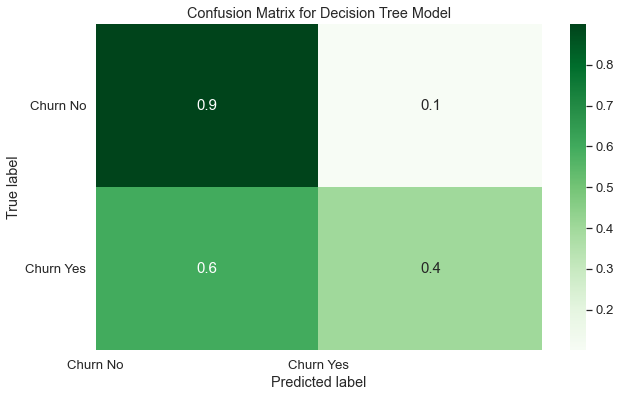

time: 250 ms (started: 2021-08-17 00:10:28 -03:00)


In [69]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_decisionTree)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0)

# Add labels to the plot
class_names = ['Churn No', 'Churn Yes']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()

In [61]:
#RESULTADOS DECISION TREE 
#Se visualizan los resultados a traves de un reporte de clasificacion
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_decisionTree))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       796
           1       0.40      0.40      0.40       134

    accuracy                           0.83       930
   macro avg       0.65      0.65      0.65       930
weighted avg       0.83      0.83      0.83       930

time: 0 ns (started: 2021-08-17 00:09:15 -03:00)


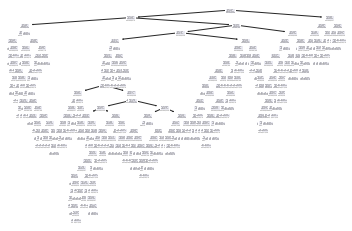

time: 24.5 s (started: 2021-08-17 00:16:31 -03:00)


In [72]:
from sklearn import tree
tree.plot_tree(model_decisionTree, proportion= True);

In [142]:
#text_representation = tree.export_text(model_decisionTree)
#print(text_representation)

time: 0 ns (started: 2021-08-17 19:54:17 -03:00)


___
___

### Grid Search CV Optimization

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

time: 16 ms (started: 2021-08-17 19:55:33 -03:00)


In [144]:
dtree_grid_search(X_test_sc,y_test,10)

{'criterion': 'gini', 'max_depth': 3}

time: 4.09 s (started: 2021-08-17 19:55:34 -03:00)


In [145]:
# Definir modelo Arbol de decision= modelo_decisionTree_U (Datos No escalados) max_depth=None
model_decisionTree_opt = DecisionTreeClassifier(criterion= 'gini', max_depth= 3, random_state= 42)

#Se entrena el modelo con valores de entrenamiento
model_decisionTree_opt.fit(X_train_sc, y_train)

#Se predicen los valores (facies) con los datos de prueba no escalados que el modelo no ha visto
y_pred_decisionTree_opt = model_decisionTree.predict(X_test_sc)

time: 62 ms (started: 2021-08-17 19:55:38 -03:00)


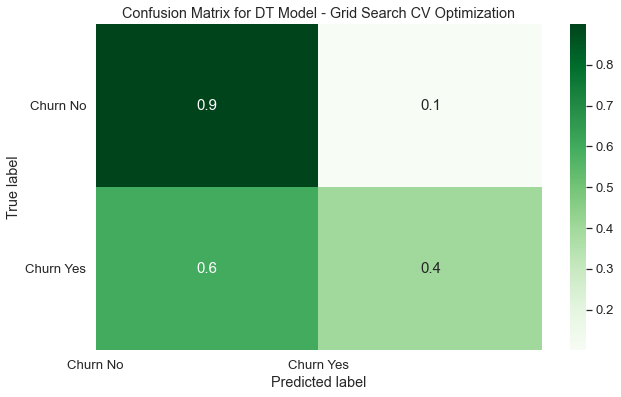

time: 297 ms (started: 2021-08-17 19:56:11 -03:00)


In [148]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_decisionTree_opt)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0)

# Add labels to the plot
class_names = ['Churn No', 'Churn Yes']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for DT Model - Grid Search CV Optimization')
plt.show()

In [79]:
#RESULTADOS DECISION TREE (Datos No escalados)
#Se visualizan los resultados a traves de un reporte de clasificacion
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_decisionTree_opt))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       796
           1       0.40      0.40      0.40       134

    accuracy                           0.83       930
   macro avg       0.65      0.65      0.65       930
weighted avg       0.83      0.83      0.83       930

time: 16 ms (started: 2021-08-17 00:46:18 -03:00)


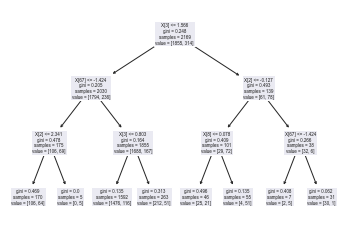

time: 781 ms (started: 2021-08-17 00:54:22 -03:00)


In [87]:
from sklearn import tree
tree.plot_tree(model_decisionTree_opt);

In [90]:
text_representation = tree.export_text(model_decisionTree_opt)
print(text_representation)

|--- feature_3 <= 1.57
|   |--- feature_67 <= -1.42
|   |   |--- feature_2 <= 2.34
|   |   |   |--- class: 0
|   |   |--- feature_2 >  2.34
|   |   |   |--- class: 1
|   |--- feature_67 >  -1.42
|   |   |--- feature_3 <= 0.80
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.80
|   |   |   |--- class: 0
|--- feature_3 >  1.57
|   |--- feature_2 <= -0.13
|   |   |--- feature_8 <= 0.08
|   |   |   |--- class: 0
|   |   |--- feature_8 >  0.08
|   |   |   |--- class: 1
|   |--- feature_2 >  -0.13
|   |   |--- feature_67 <= -1.42
|   |   |   |--- class: 1
|   |   |--- feature_67 >  -1.42
|   |   |   |--- class: 0

time: 16 ms (started: 2021-08-17 00:56:52 -03:00)


___
___

## Random Forest

In [62]:
# Defining Random Forest model
randomForest = RandomForestClassifier(random_state=42)

# Training Random Forest model
randomForest.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=42)

time: 1.14 s (started: 2021-08-17 00:09:33 -03:00)


### RF Model prediction & evaluation:

In [63]:
# Make predictions for the test dataset
y_pred_RF_test = randomForest.predict(X_test_sc)

time: 32 ms (started: 2021-08-17 00:09:34 -03:00)


In [64]:
# View accuracy score of predictions from trained model against the labels of the test dataset
randomForest_Accuracy= accuracy_score(y_test, y_pred_RF_test)
randomForest_f1score= f1_score(y_test, y_pred_RF_test)

print('Random Forest Model Accuracy:',("{:.2f}".format(randomForest_Accuracy*100)), "%")
print('Random Forest f1 Score:',("{:.2f}".format(randomForest_f1score*100)), "%")

Random Forest Model Accuracy: 87.85 %
Random Forest f1 Score: 34.68 %
time: 15 ms (started: 2021-08-17 00:09:34 -03:00)


### RF Confusion matrix:

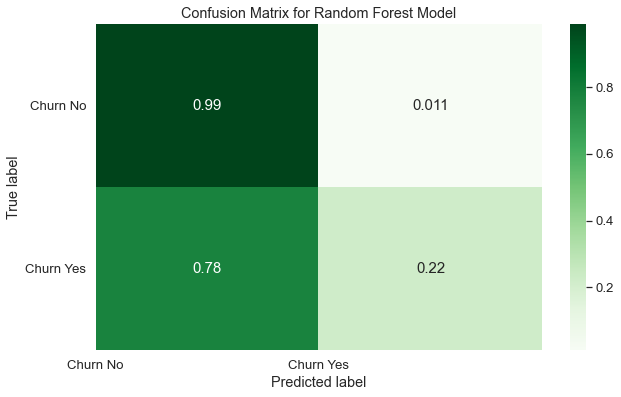

time: 797 ms (started: 2021-08-17 00:09:34 -03:00)


In [65]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_RF_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
sns.heatmap(matrix, annot=True, annot_kws={'size':15},
            cmap=plt.cm.Greens, linewidths=0)

# Add labels to the plot
class_names = ['Churn No', 'Churn Yes']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### RF Classification report:

In [66]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_RF_test))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       796
           1       0.77      0.22      0.35       134

    accuracy                           0.88       930
   macro avg       0.83      0.61      0.64       930
weighted avg       0.87      0.88      0.85       930

time: 0 ns (started: 2021-08-17 00:09:35 -03:00)


---

## RF Features importance evaluation:

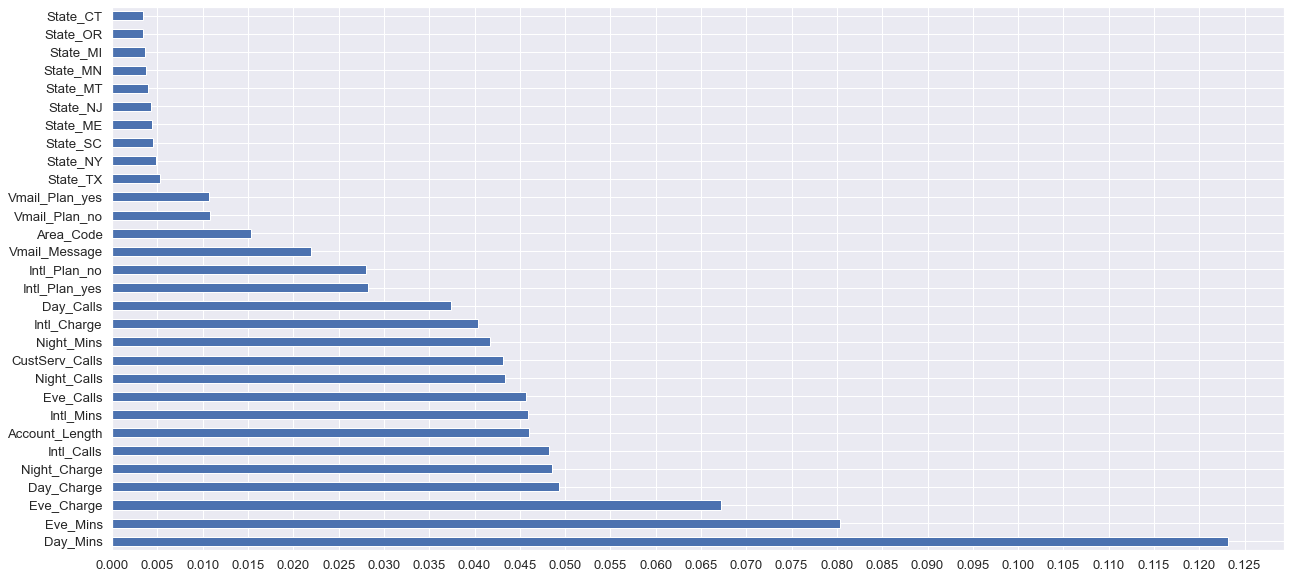

time: 26.5 s (started: 2021-08-17 00:09:37 -03:00)


In [67]:
# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=42, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train_sc, y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
plt.figure(figsize=(21,10))
#plt.axis([0, 0.16, 0, 120])
plt.xticks(np.arange(0,0.16,0.005))
feat_importances.nlargest(30).plot(kind='barh')
plt.show()